# Import the necessary libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Reading the file

In [4]:
# Read the CSV file
file_path = 'data/DamAnomaly.csv'
data = pd.read_csv(file_path)

In [5]:
data

Level  Temperature_7  Rad01  Tan01  Rad02  Tan02  Rad03  Tan03  Rad04  \
0     51.82       5.530000  0.137 -0.718  1.716 -1.301  4.261 -1.974  0.832   
1     49.74       3.885000  0.309 -0.591  1.411 -1.523  4.409 -1.928  0.954   
2     49.20       4.166667  0.377 -0.534  1.568 -1.431  4.020 -1.990  0.910   
3     45.81       4.225000  0.043 -0.730  1.399 -1.399  4.137 -1.887  1.021   
4     48.38       3.742000 -0.047 -0.649  1.514 -1.446  3.895 -1.712  1.048   
...     ...            ...    ...    ...    ...    ...    ...    ...    ...   
8763  56.20       2.956000 -0.463 -0.448  0.894 -1.225  2.304 -1.433  0.750   
8764  56.06       2.161000 -0.173 -0.468  0.856 -1.406  2.470 -1.608  0.756   
8765  54.68       2.103000 -0.226 -0.353  0.891 -1.086  2.323 -1.647  0.859   
8766  53.84       1.897000 -0.261 -0.579  0.808 -1.317  2.492 -1.555  0.836   
8767  50.53       1.733000 -0.142 -0.562  0.666 -1.172  2.369 -1.388  0.817   

      Tan04  ...  Tan24   Rad25  Tan25   Rad26  Tan26  Rad27  Tan27  Rad28  \
0    -0.359  ...  1.501  10.434  1.715  12.016  1.467  0.495  1.162  2.554   
1    -0.496  ...  1.353  10.021  1.554  11.750  1.152  0.285  0.989  2.323   
2    -0.538  ...  1.141   9.964  1.349  11.428  1.192  0.237  0.873  2.478   
3    -0.323  ...  1.157   9.306  1.381  11.240  1.075  0.285  1.198  2.452   
4    -0.381  ...  1.291   9.574  1.250  11.048  1.245  0.422  0.892  2.400   
...     ...  ...    ...     ...    ...     ...    ...    ...    ...    ...   
8763 -0.389  ...  0.989   6.847  1.618   7.758  1.221  0.106  0.673  0.991   
8764 -0.268  ...  1.220   7.049  1.592   8.217  1.408  0.118  0.750  1.150   
8765 -0.158  ...  0.999   6.978  1.618   8.066  1.093  0.192  0.675  1.160   
8766 -0.414  ...  1.204   6.775  1.483   8.089  1.255  0.069  0.507  0.967   
8767 -0.151  ...  1.032   6.911  1.617   8.139  1.115  0.076  0.605  1.092   

      Tan28  Case  
0     1.092     0  
1     1.183     0  
2     1.157     0  
3     1.184     0  
4     1.169     0  
...     ...   ...  
8763  0.844     4  
8764  0.985     4  
8765  1.010     4  
8766  0.867     4  
8767  0.737     4  

[8768 rows x 59 columns]

In [6]:
data.head()

Level  Temperature_7  Rad01  Tan01  Rad02  Tan02  Rad03  Tan03  Rad04  \
0  51.82       5.530000  0.137 -0.718  1.716 -1.301  4.261 -1.974  0.832   
1  49.74       3.885000  0.309 -0.591  1.411 -1.523  4.409 -1.928  0.954   
2  49.20       4.166667  0.377 -0.534  1.568 -1.431  4.020 -1.990  0.910   
3  45.81       4.225000  0.043 -0.730  1.399 -1.399  4.137 -1.887  1.021   
4  48.38       3.742000 -0.047 -0.649  1.514 -1.446  3.895 -1.712  1.048   

   Tan04  ...  Tan24   Rad25  Tan25   Rad26  Tan26  Rad27  Tan27  Rad28  \
0 -0.359  ...  1.501  10.434  1.715  12.016  1.467  0.495  1.162  2.554   
1 -0.496  ...  1.353  10.021  1.554  11.750  1.152  0.285  0.989  2.323   
2 -0.538  ...  1.141   9.964  1.349  11.428  1.192  0.237  0.873  2.478   
3 -0.323  ...  1.157   9.306  1.381  11.240  1.075  0.285  1.198  2.452   
4 -0.381  ...  1.291   9.574  1.250  11.048  1.245  0.422  0.892  2.400   

   Tan28  Case  
0  1.092     0  
1  1.183     0  
2  1.157     0  
3  1.184     0  
4  1.169     0  

[5 rows x 59 columns]

In [7]:
data.tail()

Level  Temperature_7  Rad01  Tan01  Rad02  Tan02  Rad03  Tan03  Rad04  \
8763  56.20          2.956 -0.463 -0.448  0.894 -1.225  2.304 -1.433  0.750   
8764  56.06          2.161 -0.173 -0.468  0.856 -1.406  2.470 -1.608  0.756   
8765  54.68          2.103 -0.226 -0.353  0.891 -1.086  2.323 -1.647  0.859   
8766  53.84          1.897 -0.261 -0.579  0.808 -1.317  2.492 -1.555  0.836   
8767  50.53          1.733 -0.142 -0.562  0.666 -1.172  2.369 -1.388  0.817   

      Tan04  ...  Tan24  Rad25  Tan25  Rad26  Tan26  Rad27  Tan27  Rad28  \
8763 -0.389  ...  0.989  6.847  1.618  7.758  1.221  0.106  0.673  0.991   
8764 -0.268  ...  1.220  7.049  1.592  8.217  1.408  0.118  0.750  1.150   
8765 -0.158  ...  0.999  6.978  1.618  8.066  1.093  0.192  0.675  1.160   
8766 -0.414  ...  1.204  6.775  1.483  8.089  1.255  0.069  0.507  0.967   
8767 -0.151  ...  1.032  6.911  1.617  8.139  1.115  0.076  0.605  1.092   

      Tan28  Case  
8763  0.844     4  
8764  0.985     4  
8765  1.010     4  
8766  0.867     4  
8767  0.737     4  

[5 rows x 59 columns]

# General information about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Level          8768 non-null   float64
 1   Temperature_7  8768 non-null   float64
 2   Rad01          8768 non-null   float64
 3   Tan01          8768 non-null   float64
 4   Rad02          8768 non-null   float64
 5   Tan02          8768 non-null   float64
 6   Rad03          8768 non-null   float64
 7   Tan03          8768 non-null   float64
 8   Rad04          8768 non-null   float64
 9   Tan04          8768 non-null   float64
 10  Rad05          8768 non-null   float64
 11  Tan05          8768 non-null   float64
 12  Rad06          8768 non-null   float64
 13  Tan06          8768 non-null   float64
 14  Rad07          8768 non-null   float64
 15  Tan07          8768 non-null   float64
 16  Rad08          8768 non-null   float64
 17  Tan08          8768 non-null   float64
 18  Rad09   

In [9]:
8768/8

1096.0

For each case we have exactly 1096 samples

If the data is collected daily it means that for each case we have 3 years of information

**Description of each of the variables**

In [10]:
data.describe()

Level  Temperature_7        Rad01        Tan01        Rad02  \
count  8768.000000    8768.000000  8768.000000  8768.000000  8768.000000   
mean     74.104206       5.956459    -0.232968    -0.665558     1.072849   
std       9.104851       6.334771     0.228676     0.158964     0.550194   
min      45.190000      -7.877000    -0.916000    -1.209000    -0.463000   
25%      72.437500       0.395500    -0.408000    -0.780000     0.709000   
50%      76.605000       5.631500    -0.210000    -0.665000     1.110000   
75%      80.750000      11.233500    -0.060000    -0.554000     1.472250   
max      83.450000      19.678000     0.403000    -0.094000     2.828000   

             Tan02        Rad03        Tan03        Rad04        Tan04  ...  \
count  8768.000000  8768.000000  8768.000000  8768.000000  8768.000000  ...   
mean     -1.400552     2.365843    -1.941802     0.920456    -0.405700  ...   
std       0.283127     1.305122     0.431239     0.279455     0.133048  ...   
min      -2.215000    -0.931000    -3.062000    -0.017000    -0.897000  ...   
25%      -1.618000     1.375000    -2.282000     0.724000    -0.496000  ...   
50%      -1.410500     2.575500    -1.965000     0.923000    -0.404000  ...   
75%      -1.195000     3.394000    -1.624000     1.130250    -0.314000  ...   
max      -0.469000     5.452000    -0.720000     1.698000     0.027000  ...   

             Rad24        Tan24        Rad25       Tan25        Rad26  \
count  8768.000000  8768.000000  8768.000000  8768.00000  8768.000000   
mean      5.951323     1.640799     7.926679     2.07839     8.533192   
std       1.262912     0.317854     2.321309     0.40247     2.924871   
min       2.496000     0.654000     1.436000     0.84500     0.862000   
25%       4.987000     1.416000     6.516000     1.80800     6.639250   
50%       6.033000     1.640000     8.079000     2.12250     8.800000   
75%       6.947000     1.857000     9.766250     2.37600    10.846000   
max       9.133000     2.625000    13.520000     3.16200    15.094000   

             Tan26        Rad27        Tan27        Rad28        Tan28  
count  8768.000000  8768.000000  8768.000000  8768.000000  8768.000000  
mean      2.062252    -0.073099     0.850780     0.897353     1.142992  
std       0.428309     0.286205     0.203833     0.906583     0.287964  
min       0.789000    -0.878000     0.149000    -1.283000     0.284000  
25%       1.829750    -0.289250     0.704000     0.132750     0.935000  
50%       2.119500    -0.044000     0.858000     1.113000     1.152000  
75%       2.336000     0.145000     1.004250     1.617000     1.359000  
max       3.352000     0.686000     1.435000     2.896000     2.041000  

[8 rows x 58 columns]

The range of the variables is different, so we will have to scale them.

In [11]:
# Group by 'Case' and apply describe to each group
description_by_case = data.groupby('Case').describe()

# Show the result
description_by_case

Level                                                             \
       count       mean       std    min      25%     50%    75%    max   
Case                                                                      
0     1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
1a    1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
1b    1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
2a    1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
2b    1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
3a    1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
3b    1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   
4     1096.0  74.104206  9.108488  45.19  72.4375  76.605  80.75  83.45   

     Temperature_7            ...    Rad28          Tan28                      \
             count      mean  ...      75%    max   count      mean       std   
Case                          ...                                               
0           1096.0  5.956459  ...  1.58025  2.615  1096.0  1.175984  0.300898   
1a          1096.0  5.956459  ...  1.55400  2.659  1096.0  1.120344  0.279296   
1b          1096.0  5.956459  ...  1.58925  2.637  1096.0  1.081412  0.268389   
2a          1096.0  5.956459  ...  1.54250  2.613  1096.0  1.254453  0.270928   
2b          1096.0  5.956459  ...  1.65375  2.896  1096.0  1.158571  0.294938   
3a          1096.0  5.956459  ...  1.61125  2.737  1096.0  1.042936  0.258440   
3b          1096.0  5.956459  ...  1.82550  2.820  1096.0  1.126908  0.273907   
4           1096.0  5.956459  ...  1.54575  2.578  1096.0  1.183331  0.301908   

                                              
        min      25%     50%      75%    max  
Case                                          
0     0.362  0.95775  1.1875  1.40825  1.928  
1a    0.382  0.91500  1.1310  1.33125  1.814  
1b    0.384  0.88675  1.0890  1.29725  1.823  
2a    0.460  1.06475  1.2565  1.46225  2.041  
2b    0.386  0.94775  1.1715  1.38550  1.875  
3a    0.284  0.84775  1.0575  1.23300  1.633  
3b    0.436  0.92375  1.1335  1.34000  1.720  
4     0.428  0.96450  1.1920  1.41675  1.882  

[8 rows x 464 columns]

**Missing values**

In [12]:
# Count empty values ​​in each column
missing_values_count = data.isnull().sum()

# Display the count of empty values
print(missing_values_count)

Level            0
Temperature_7    0
Rad01            0
Tan01            0
Rad02            0
Tan02            0
Rad03            0
Tan03            0
Rad04            0
Tan04            0
Rad05            0
Tan05            0
Rad06            0
Tan06            0
Rad07            0
Tan07            0
Rad08            0
Tan08            0
Rad09            0
Tan09            0
Rad10            0
Tan10            0
Rad11            0
Tan11            0
Rad12            0
Tan12            0
Rad13            0
Tan13            0
Rad14            0
Tan14            0
Rad15            0
Tan15            0
Rad16            0
Tan16            0
Rad17            0
Tan17            0
Rad18            0
Tan18            0
Rad19            0
Tan19            0
Rad20            0
Tan20            0
Rad21            0
Tan21            0
Rad22            0
Tan22            0
Rad23            0
Tan23            0
Rad24            0
Tan24            0
Rad25            0
Tan25            0
Rad26       

# Data visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


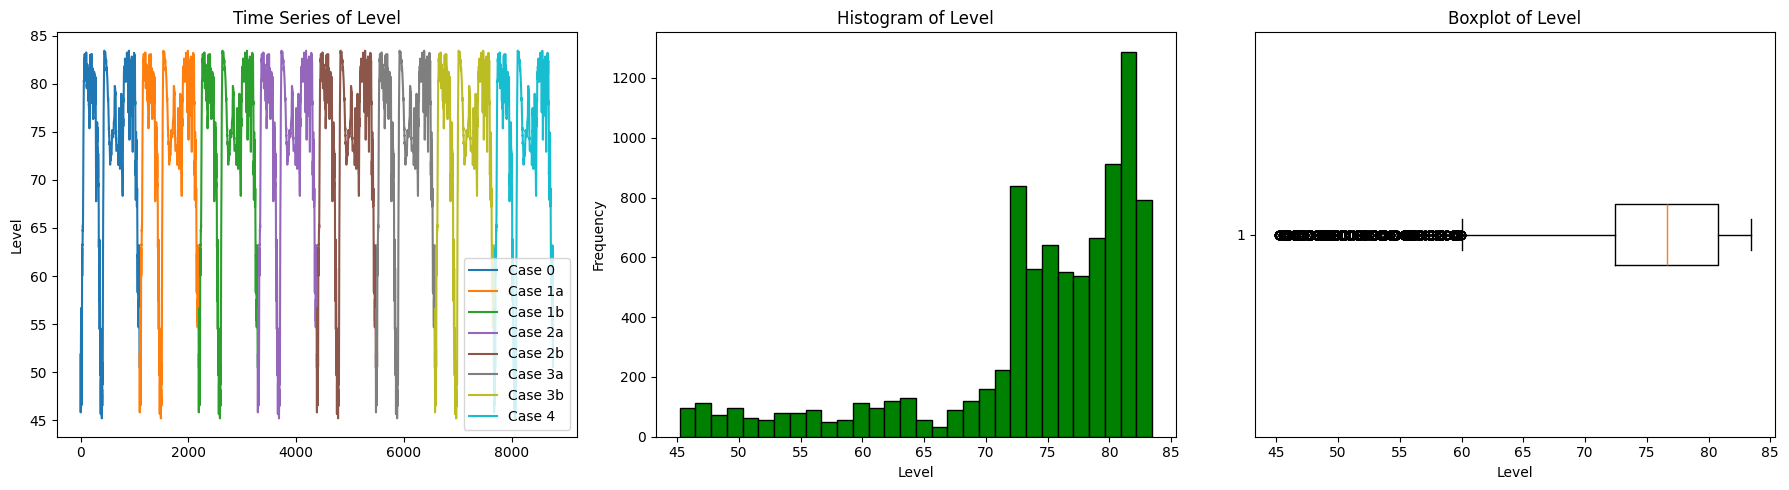

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


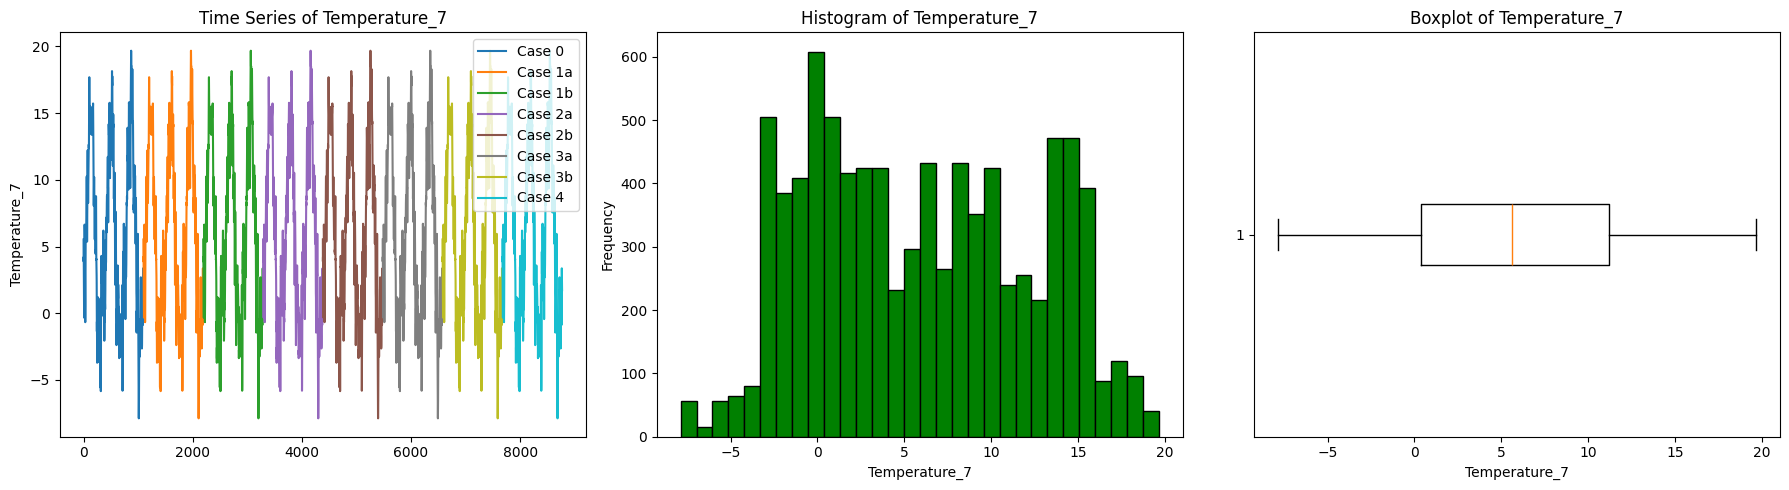

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


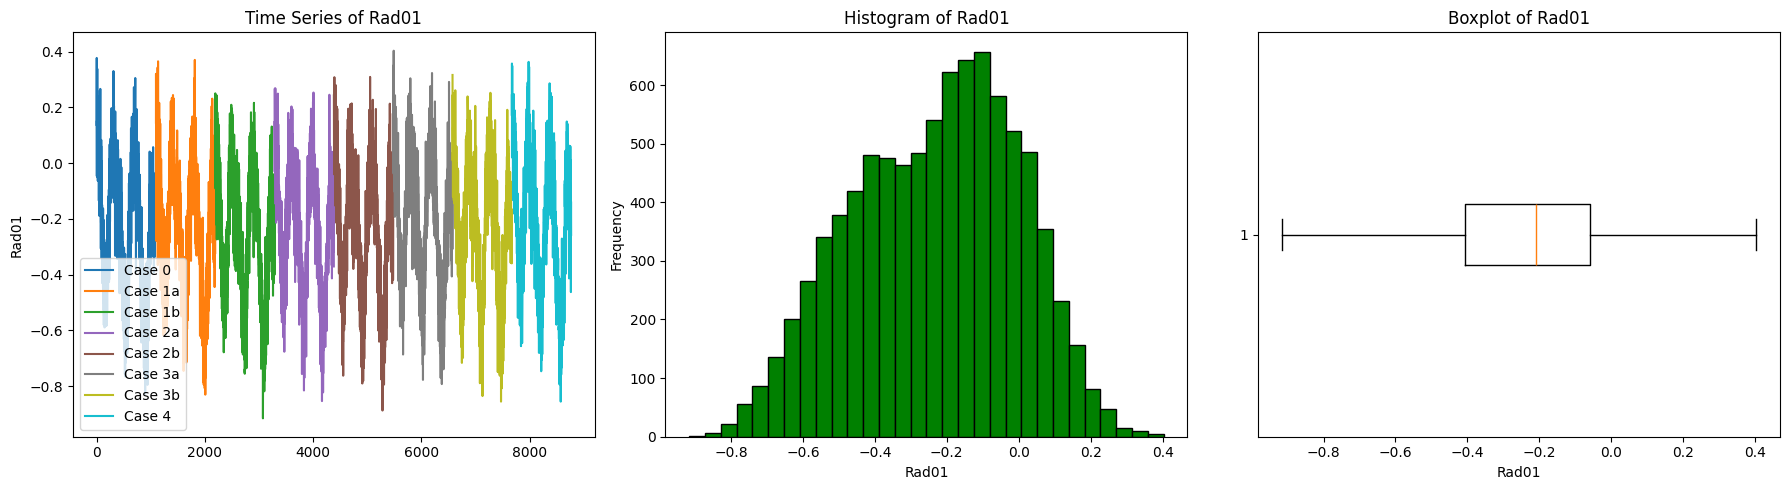

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


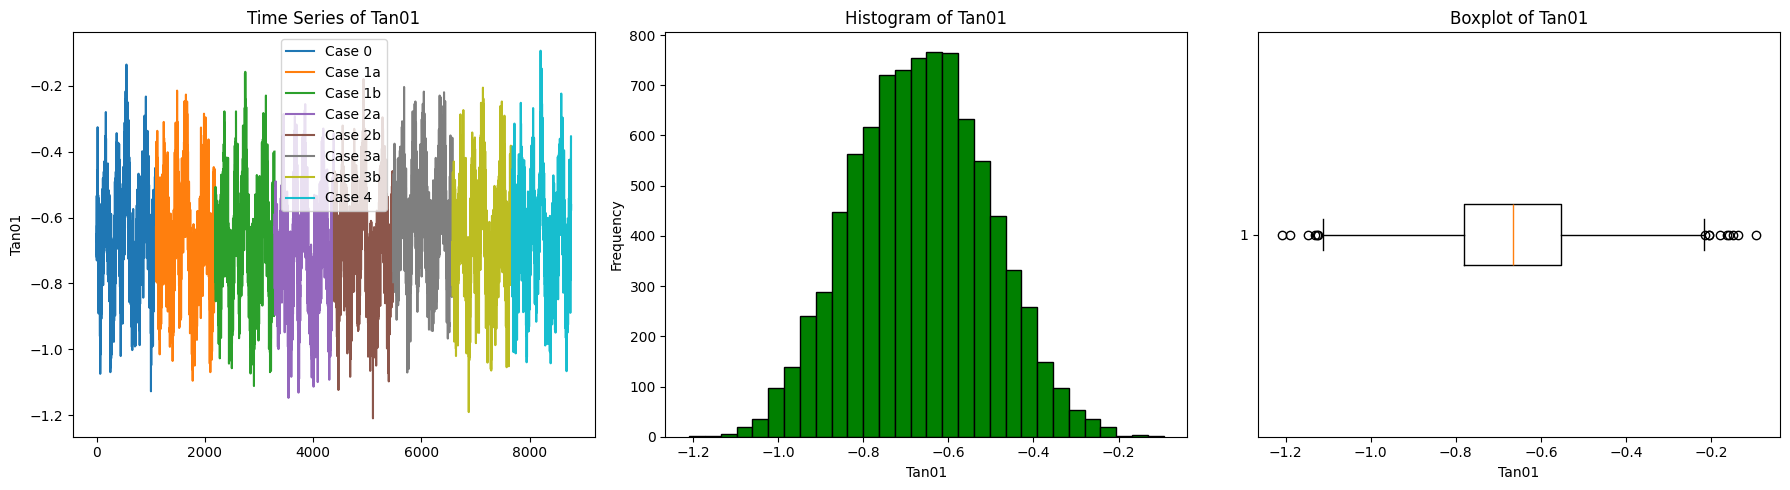

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


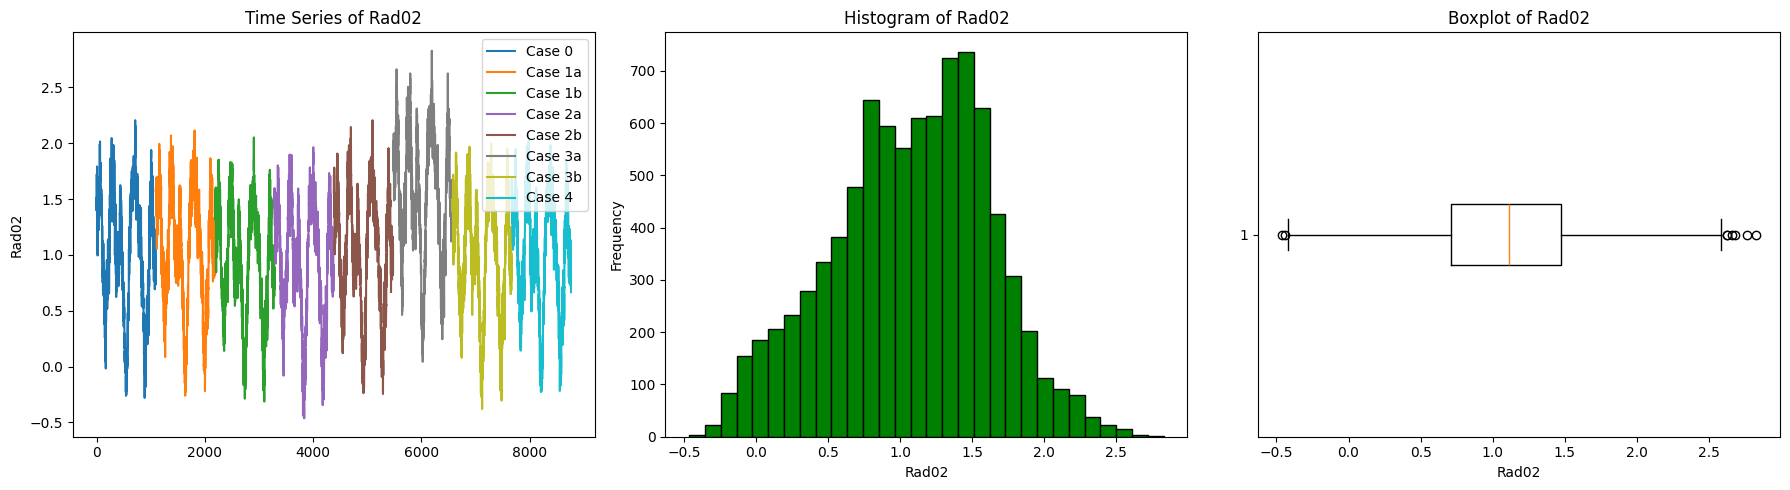

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


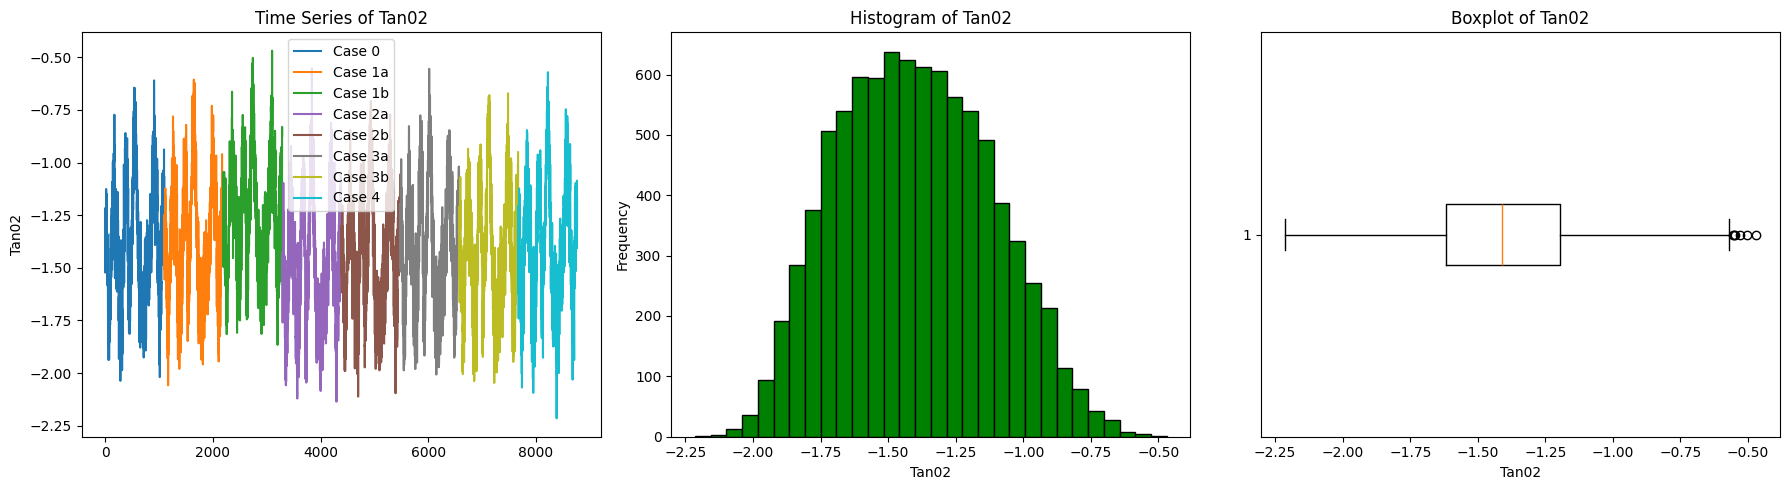

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


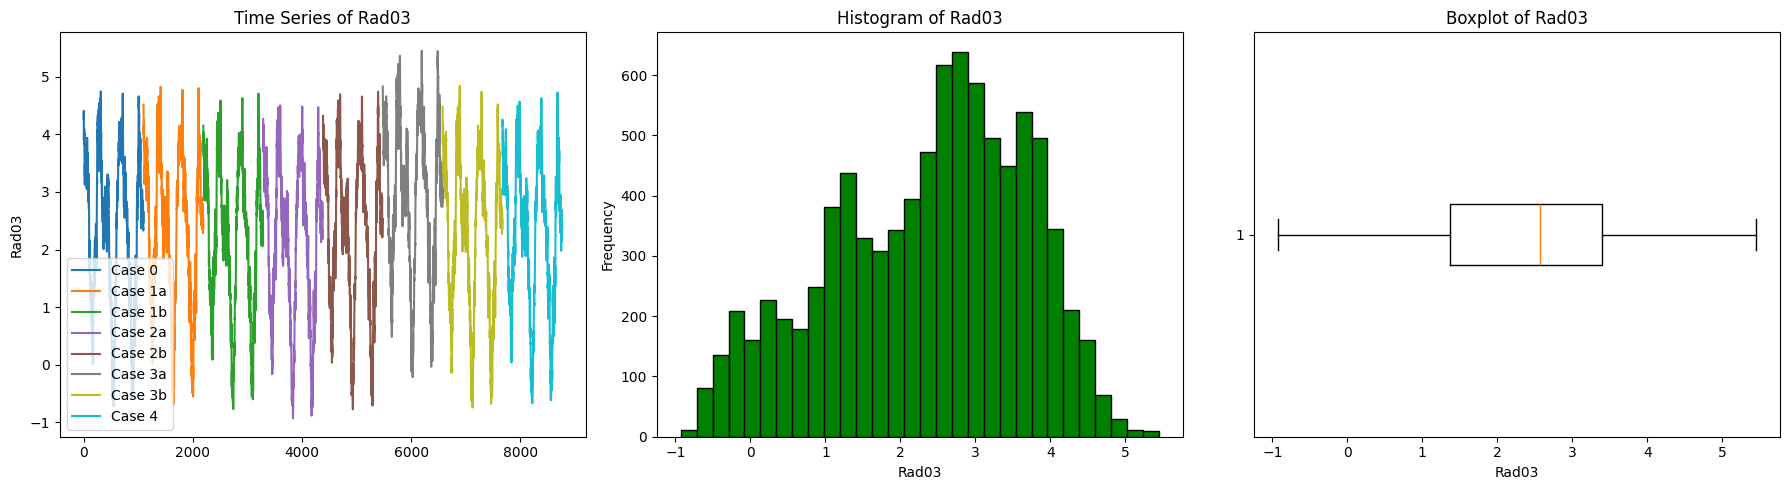

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


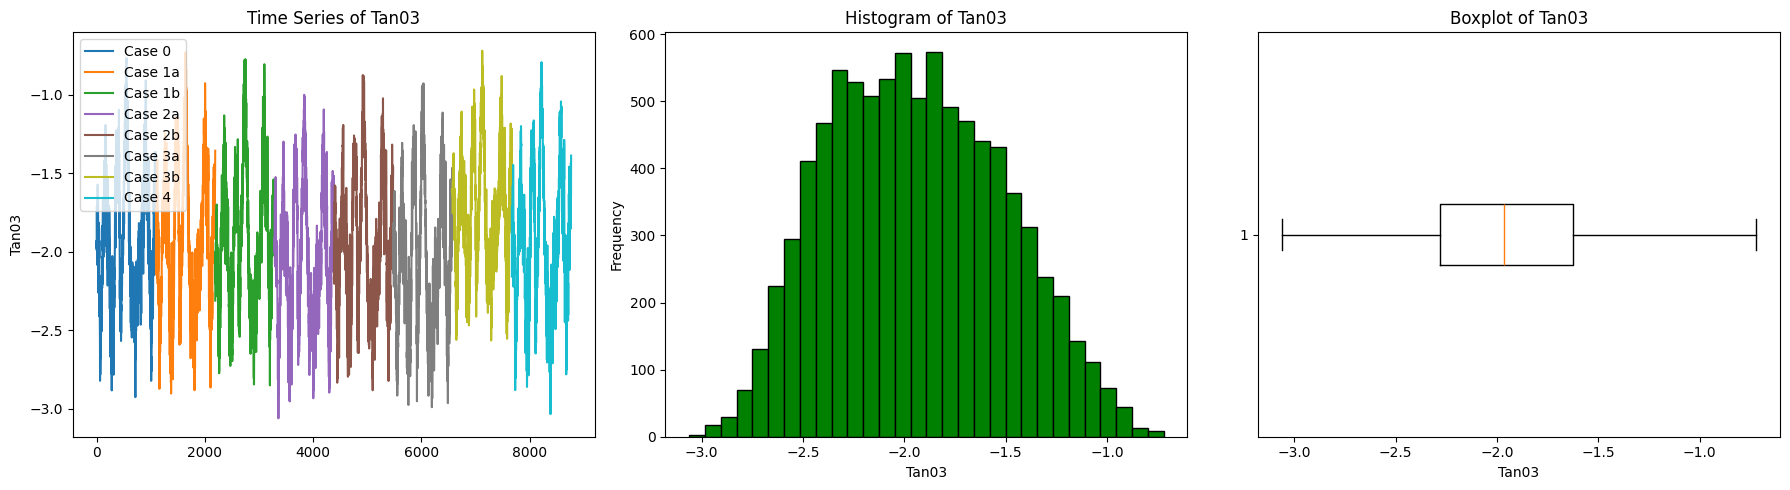

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


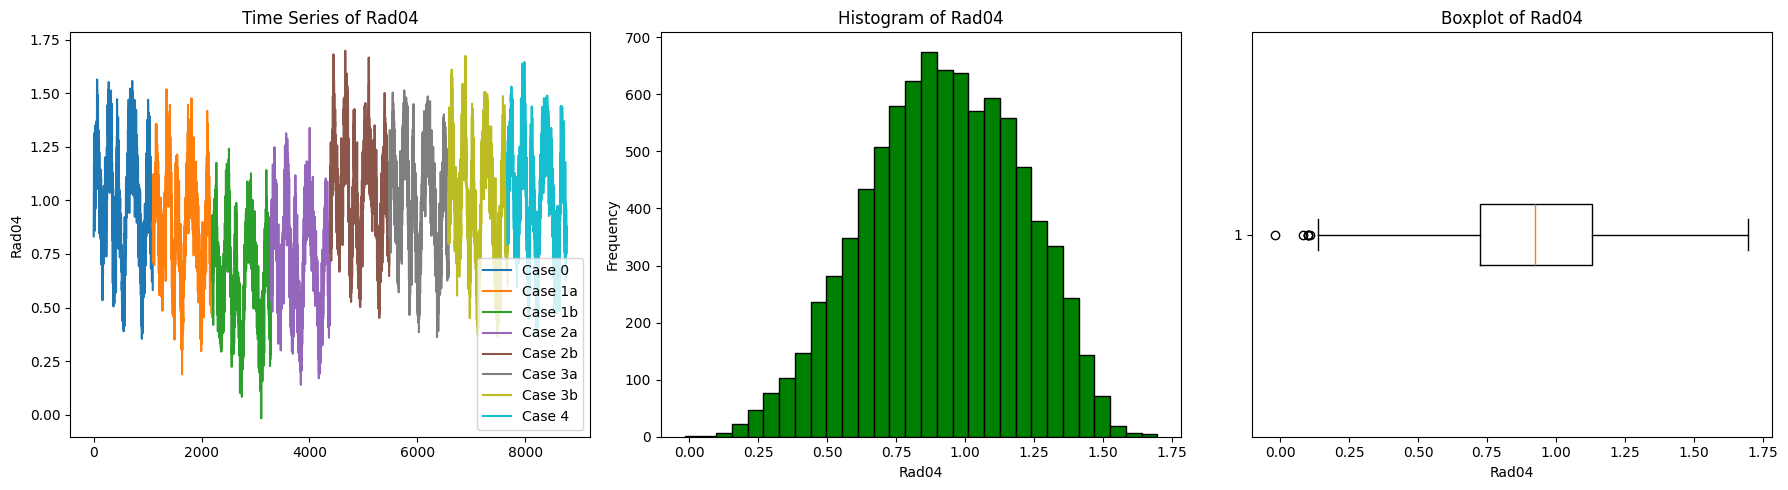

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


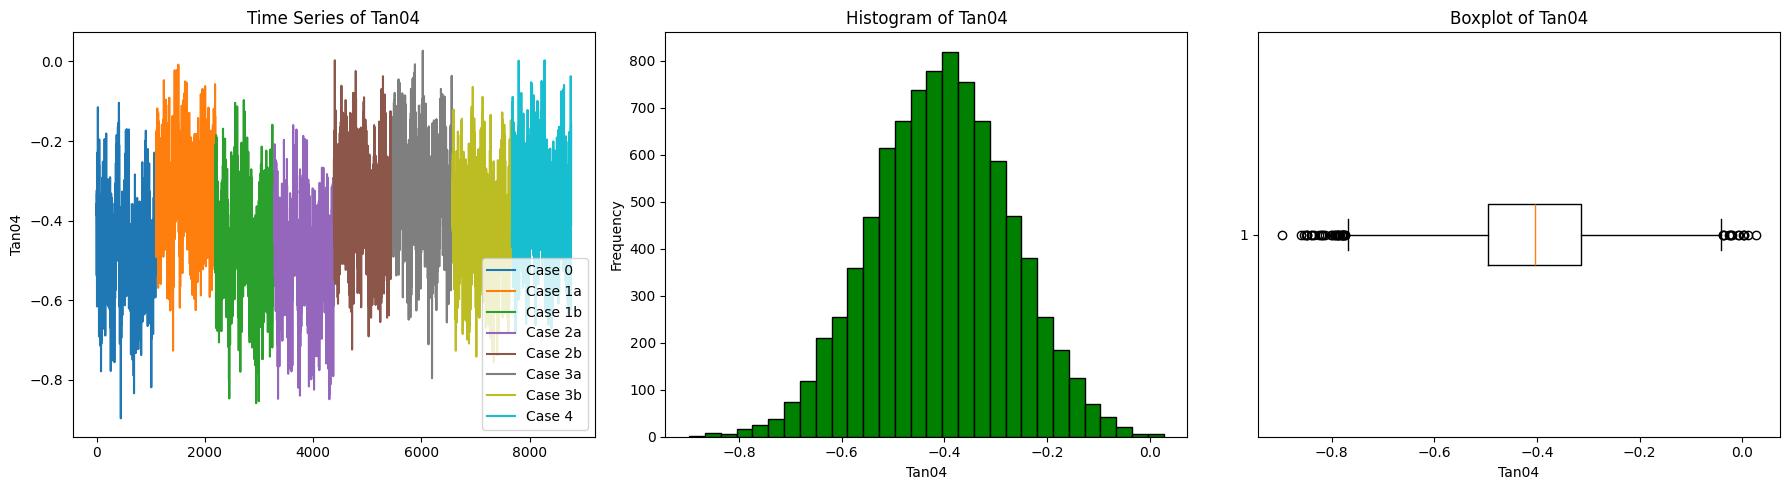

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


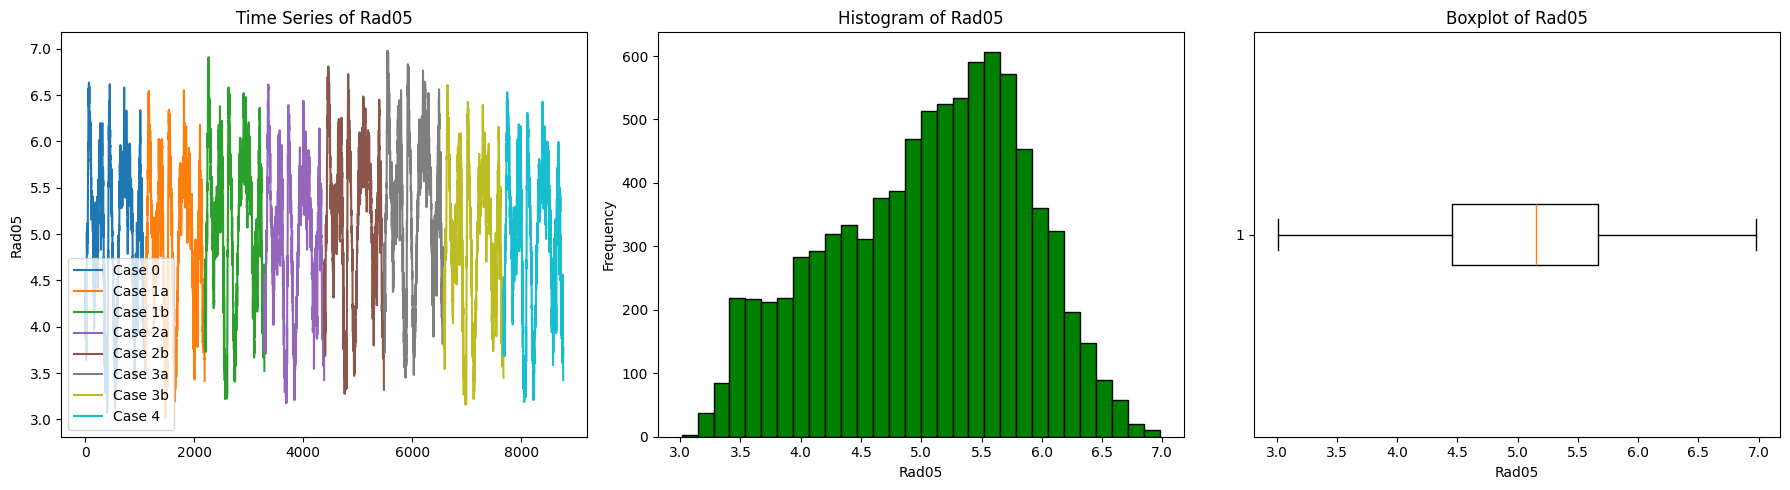

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


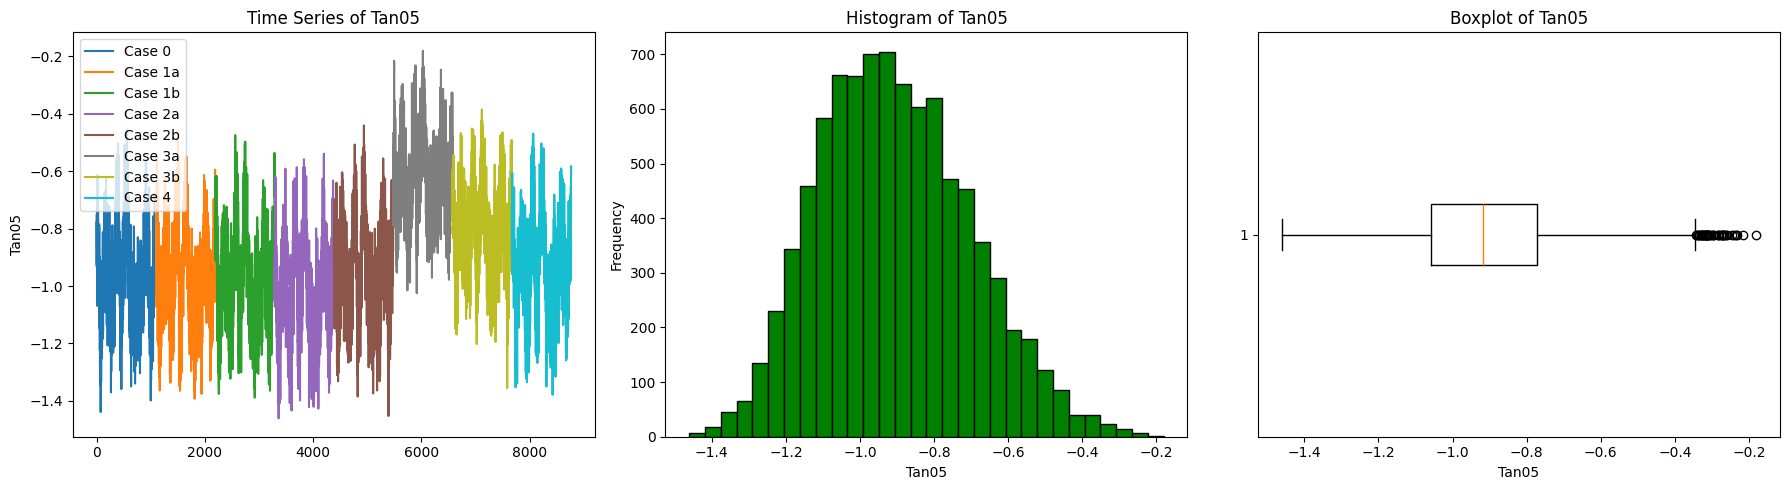

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


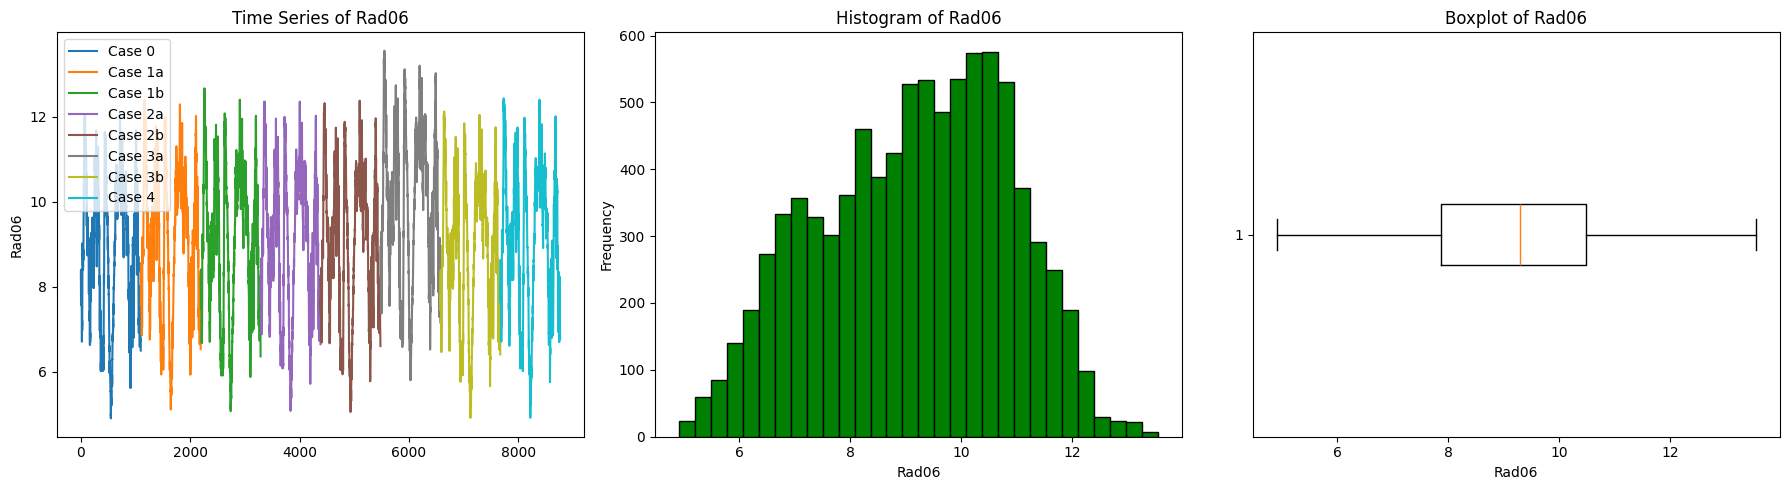

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


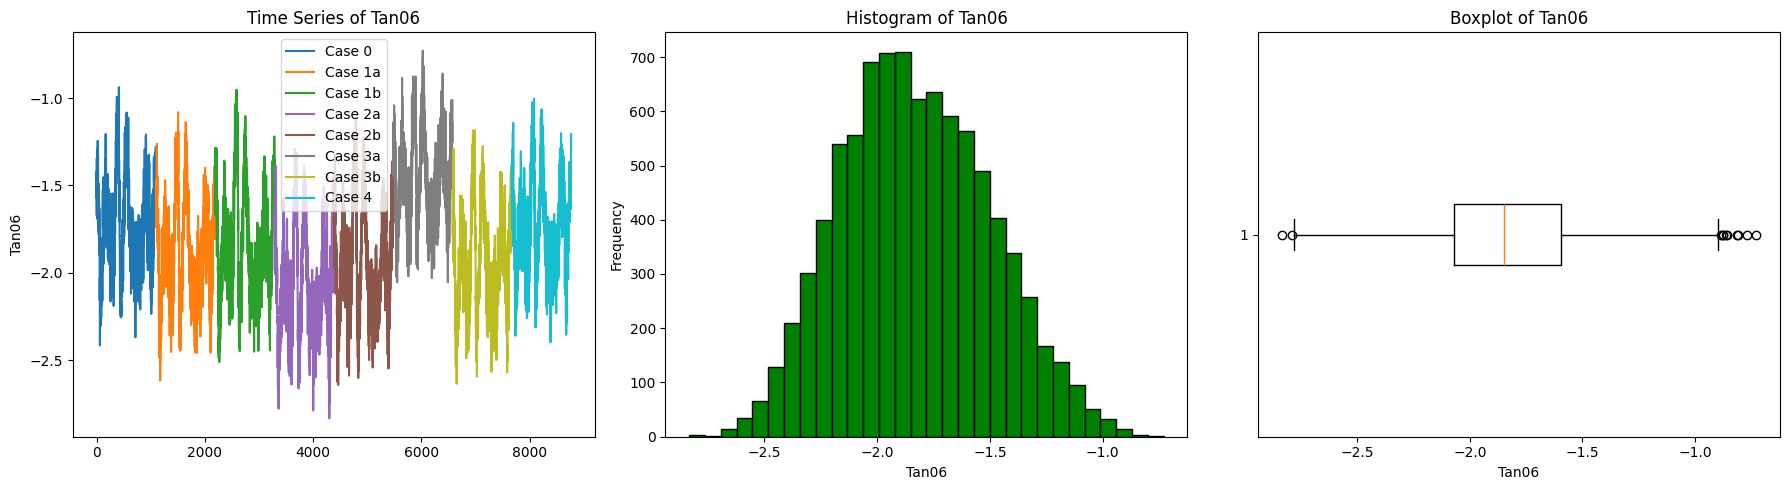

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


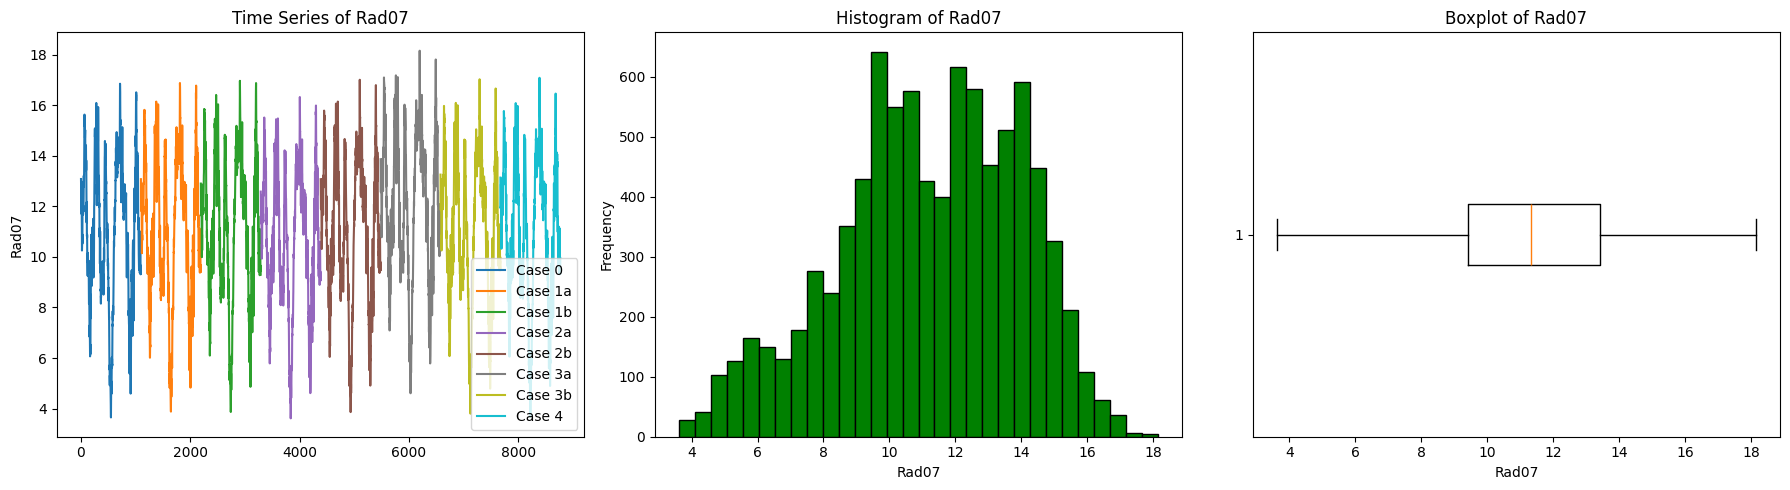

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


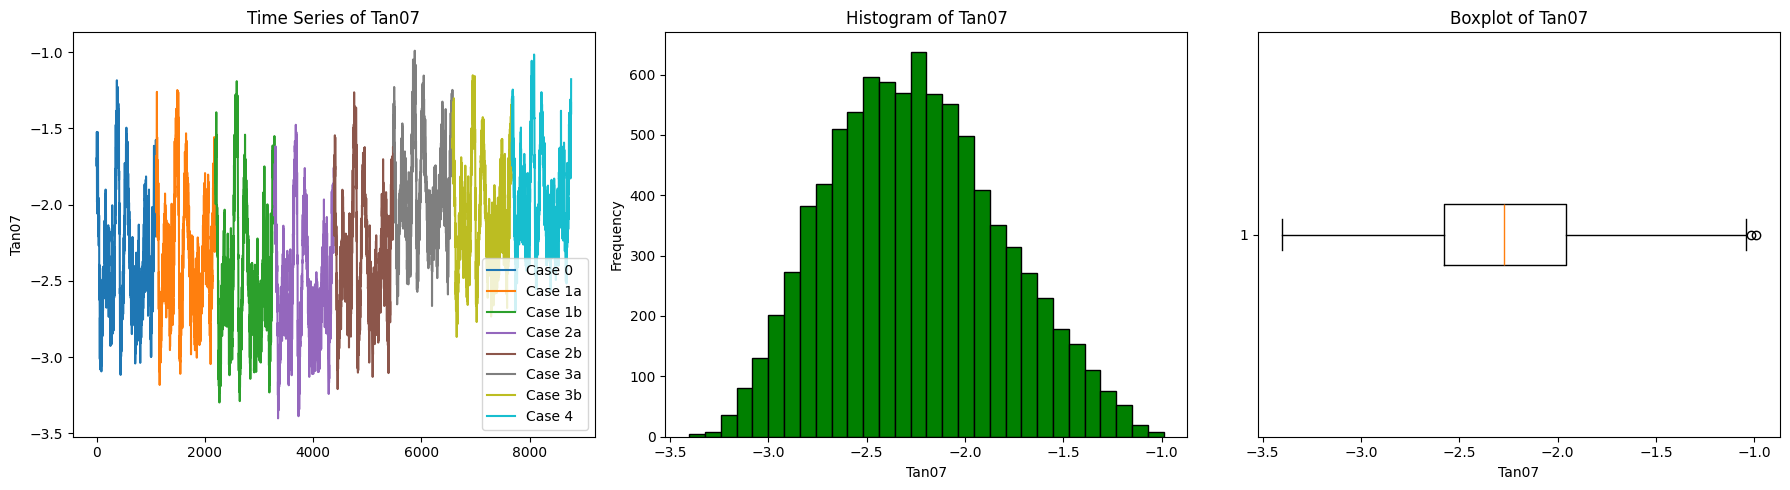

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


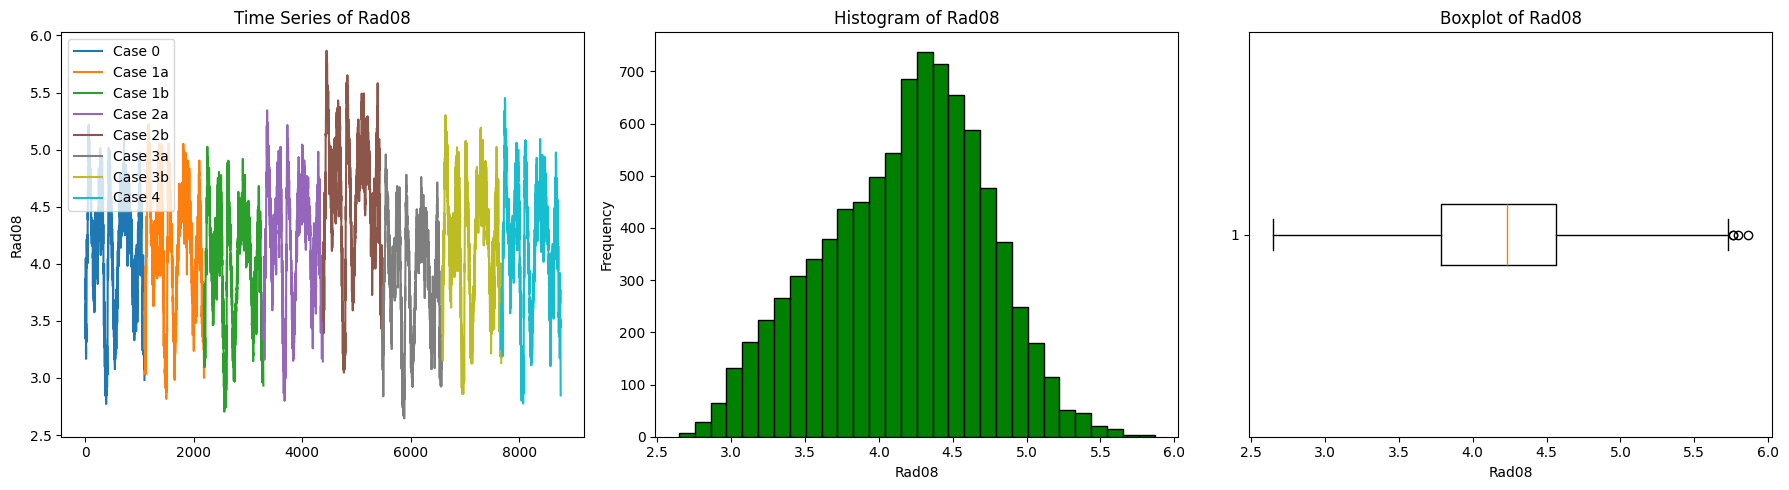

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


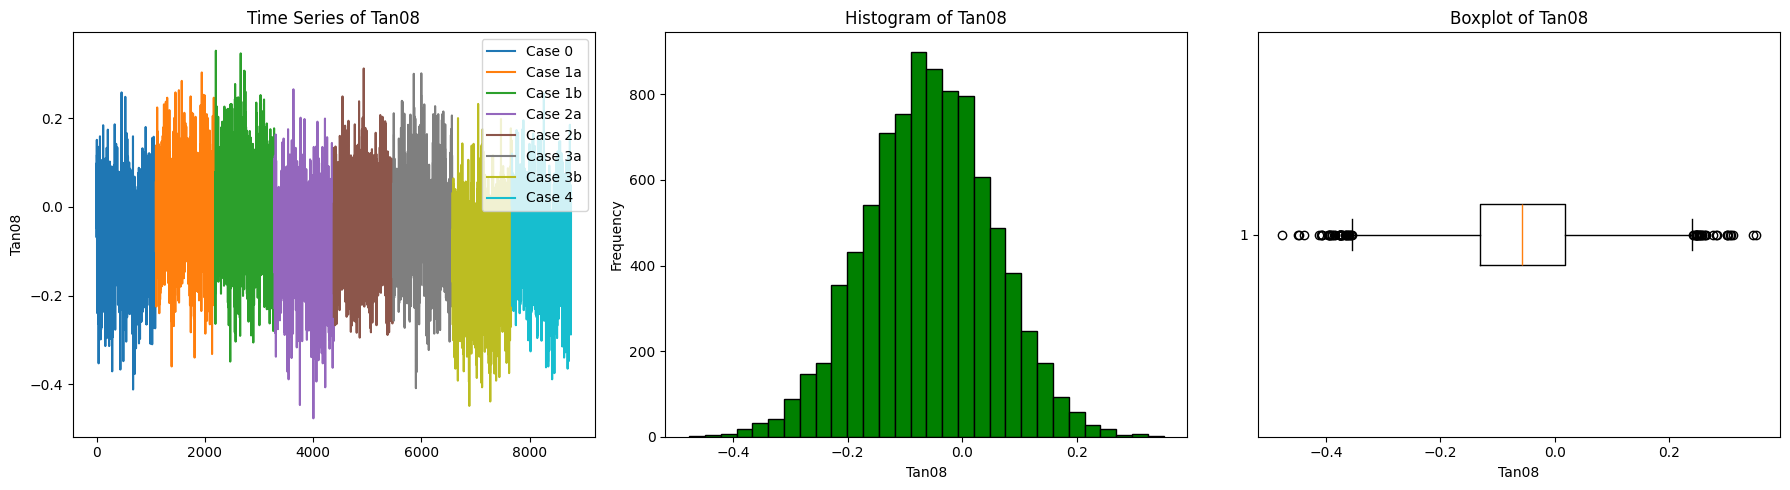

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


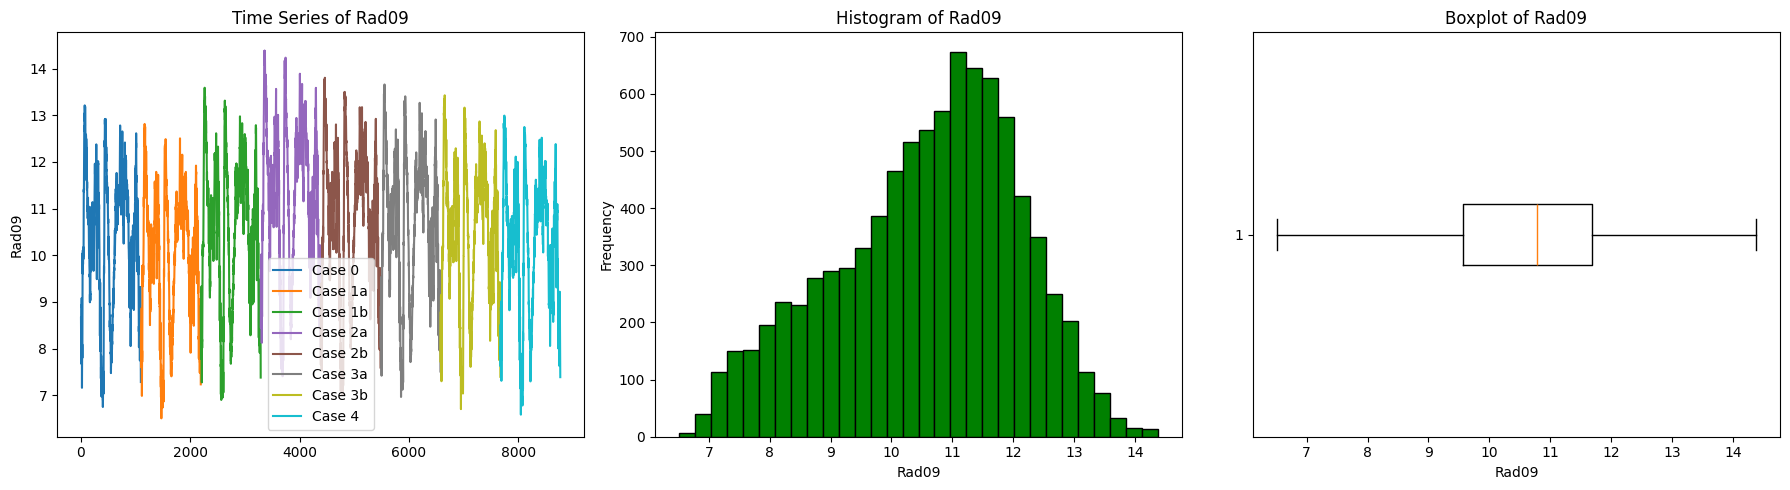

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


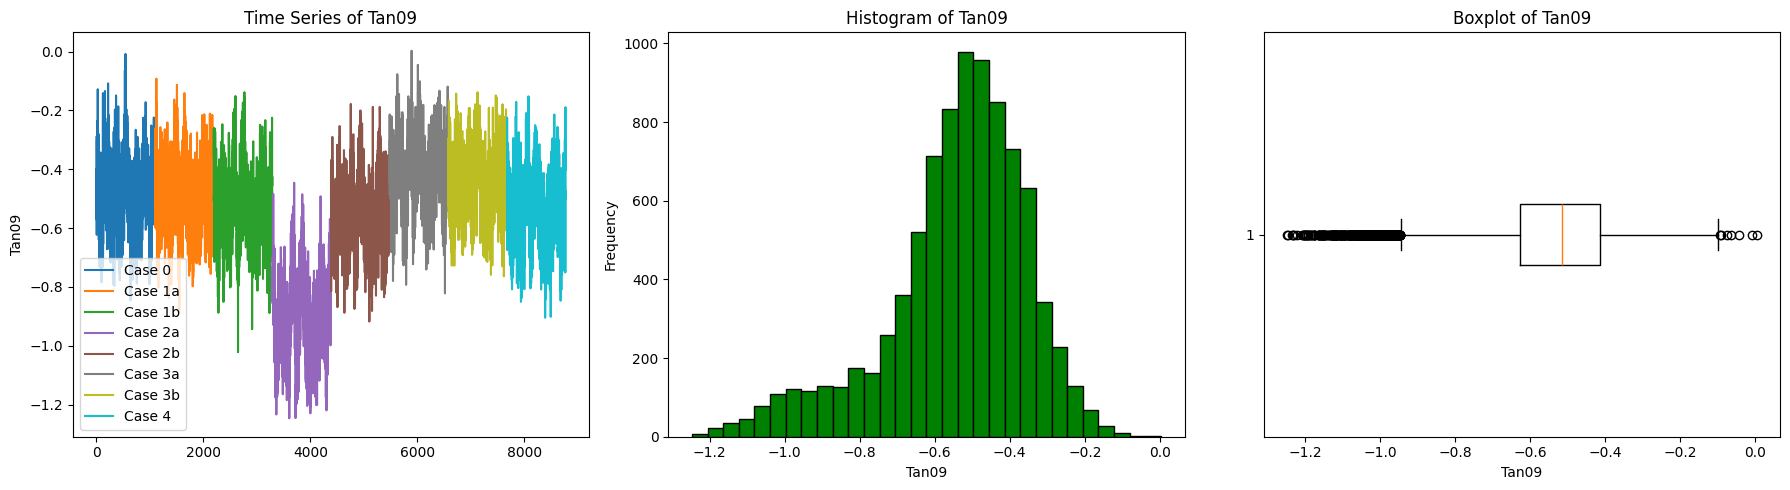

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


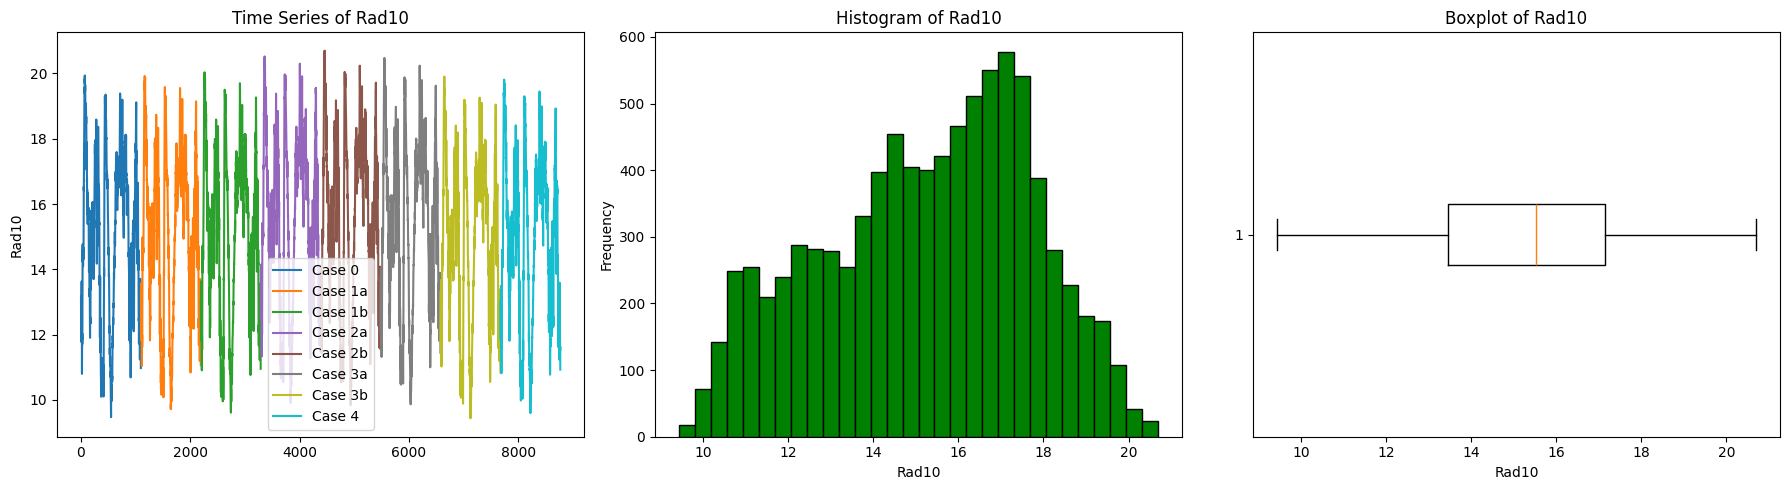

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


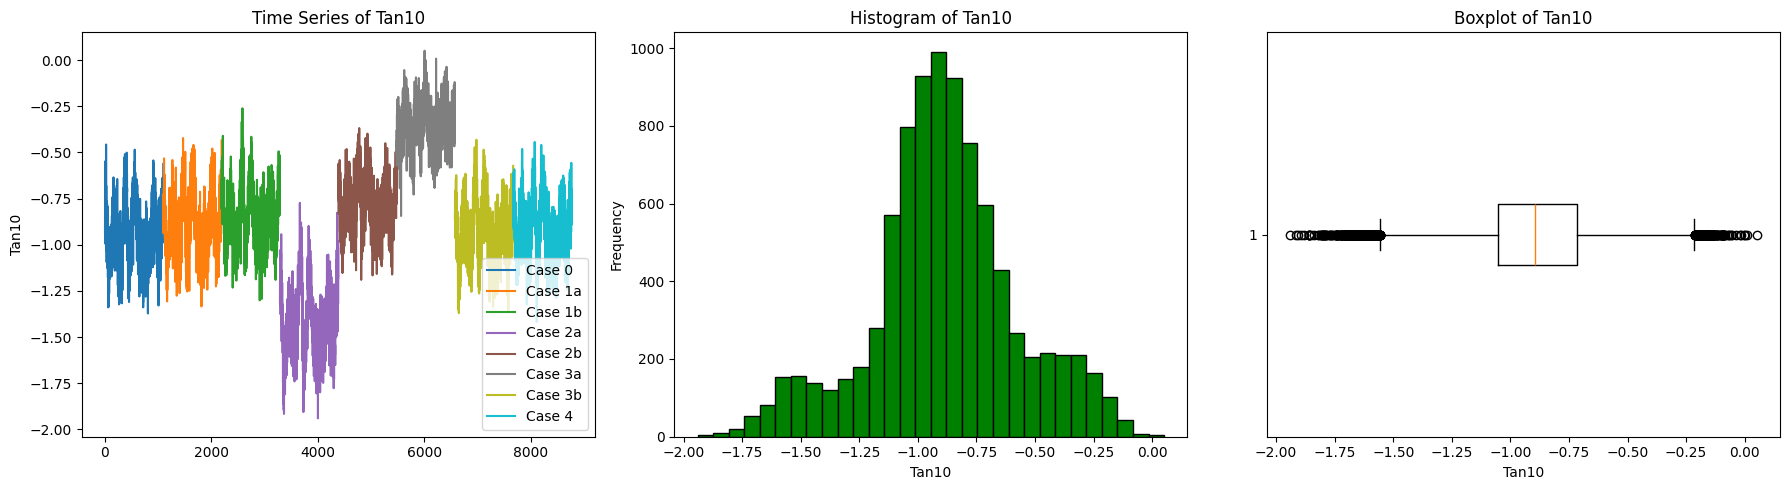

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


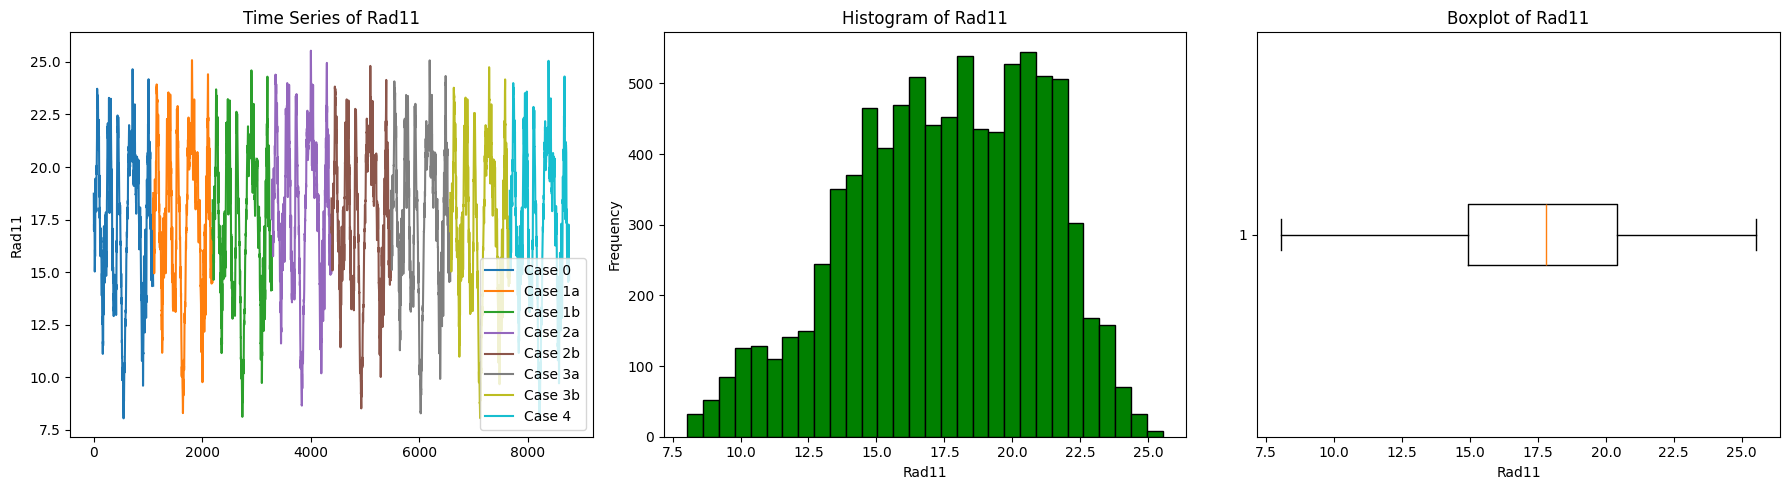

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


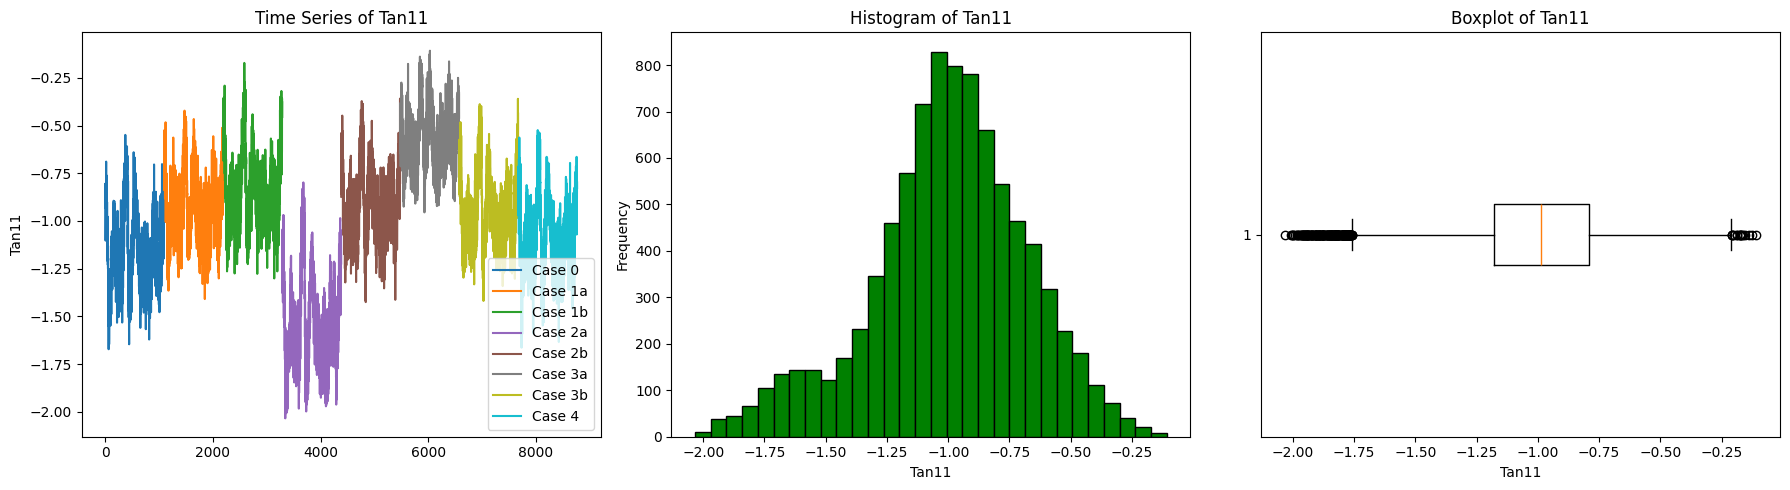

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


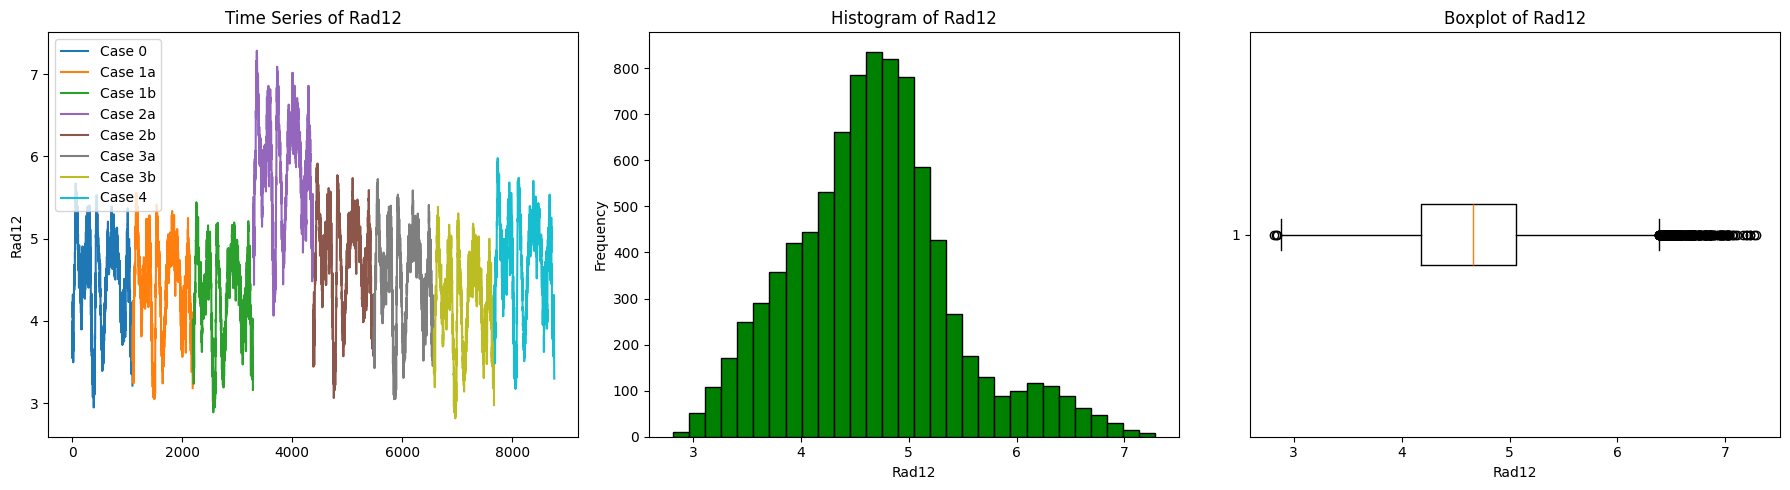

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


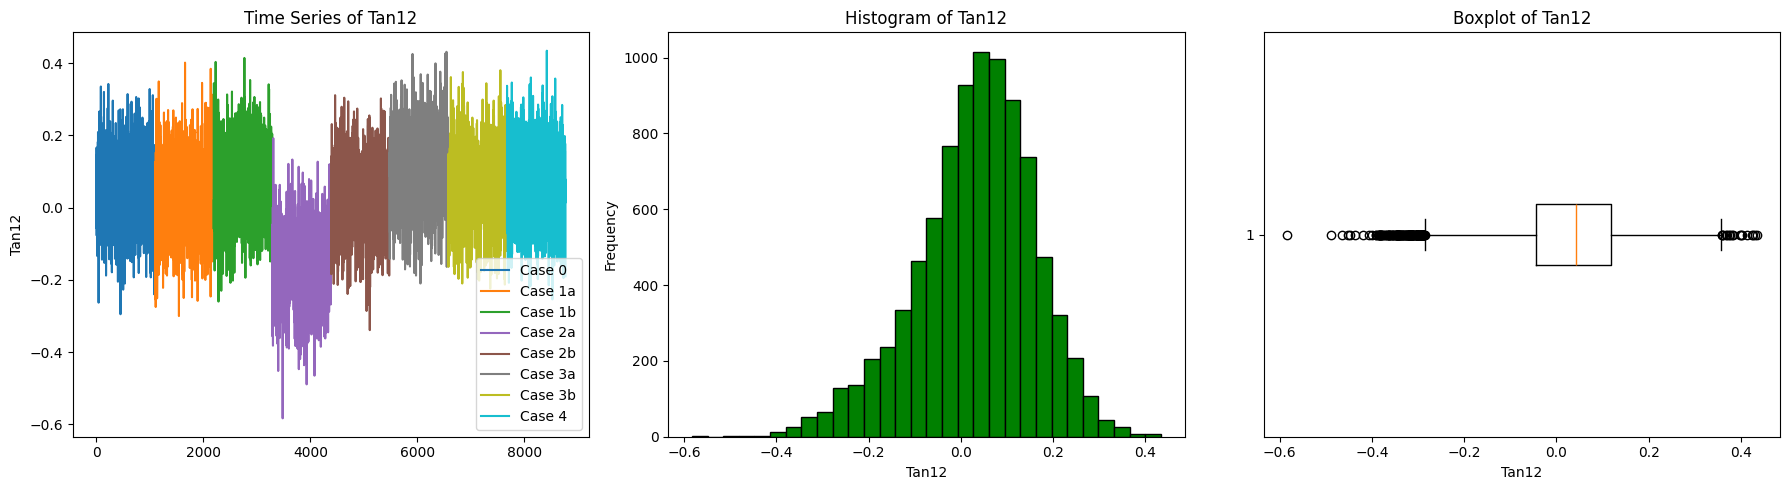

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


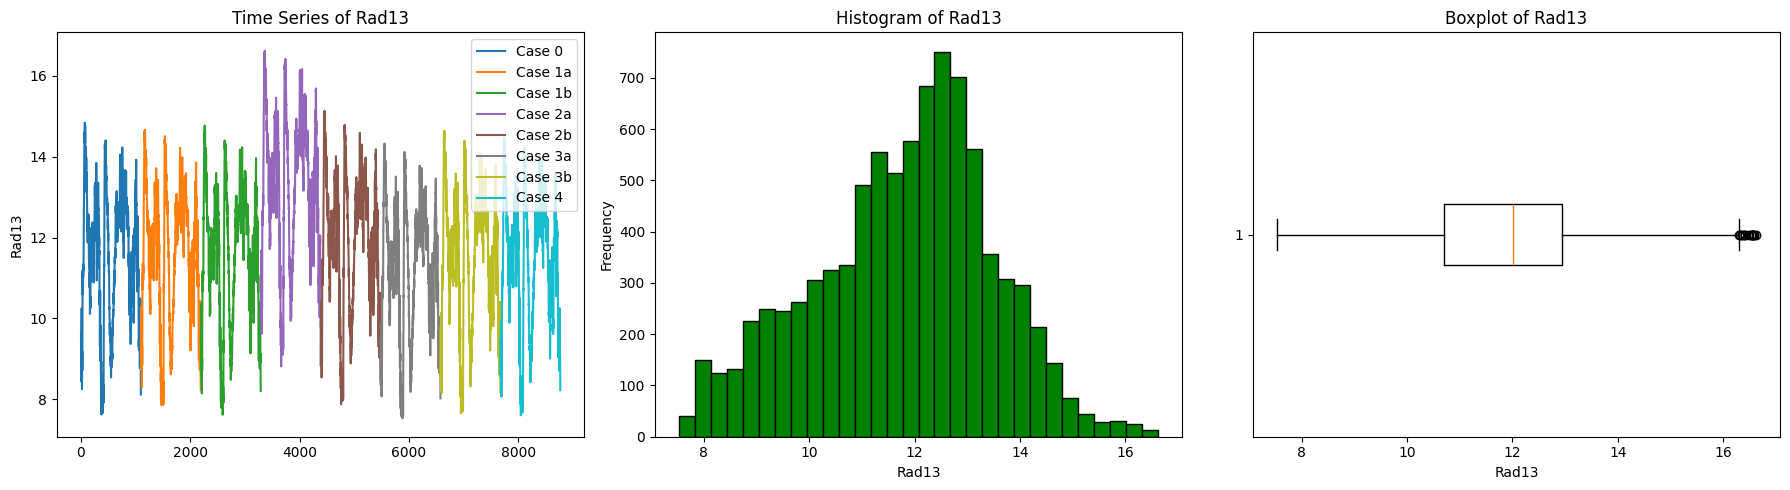

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


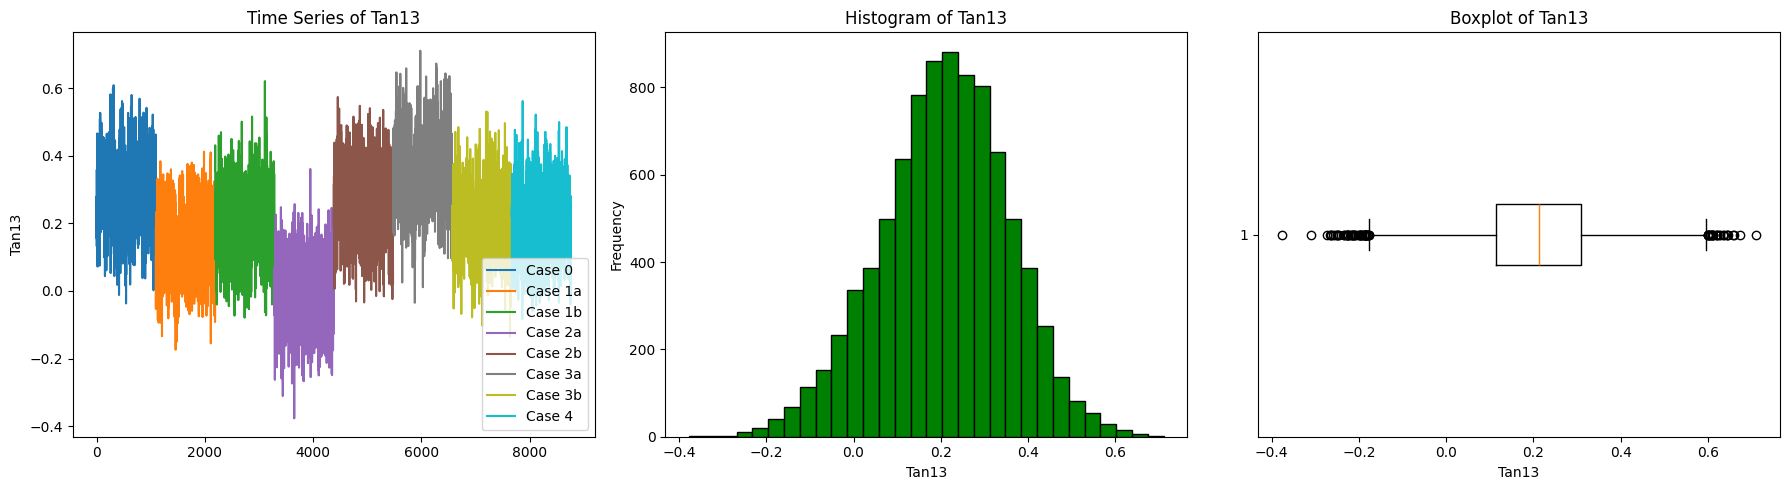

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


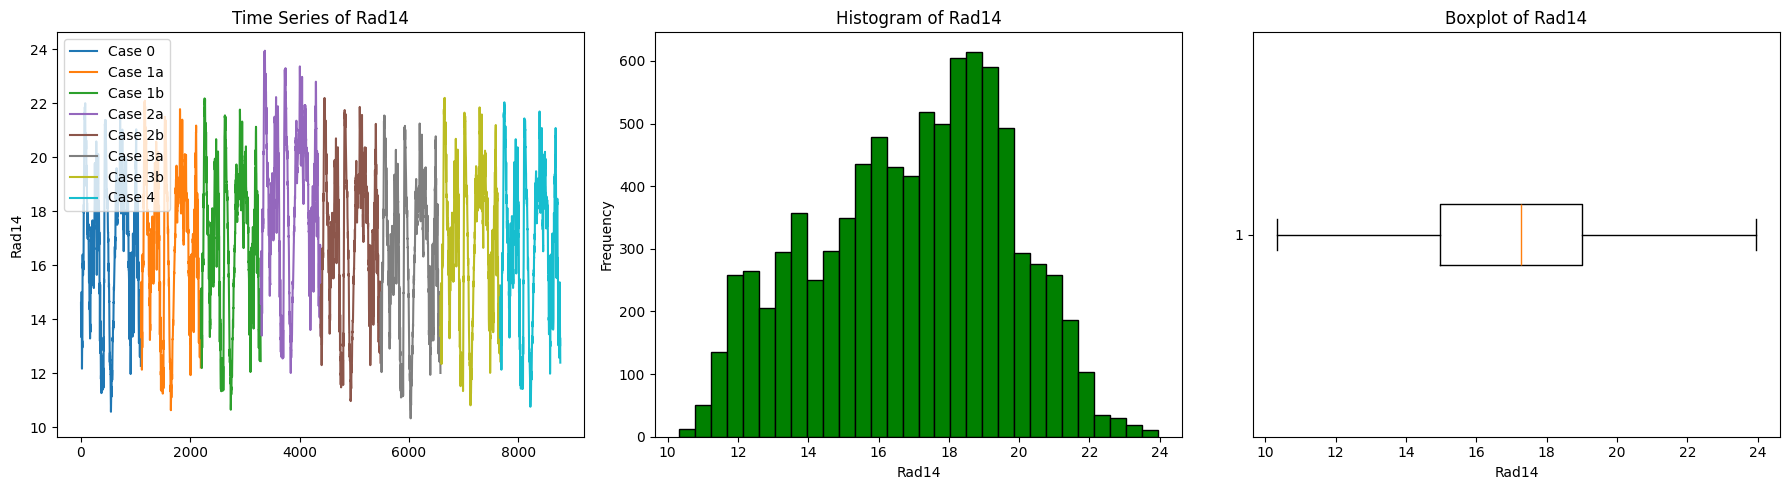

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


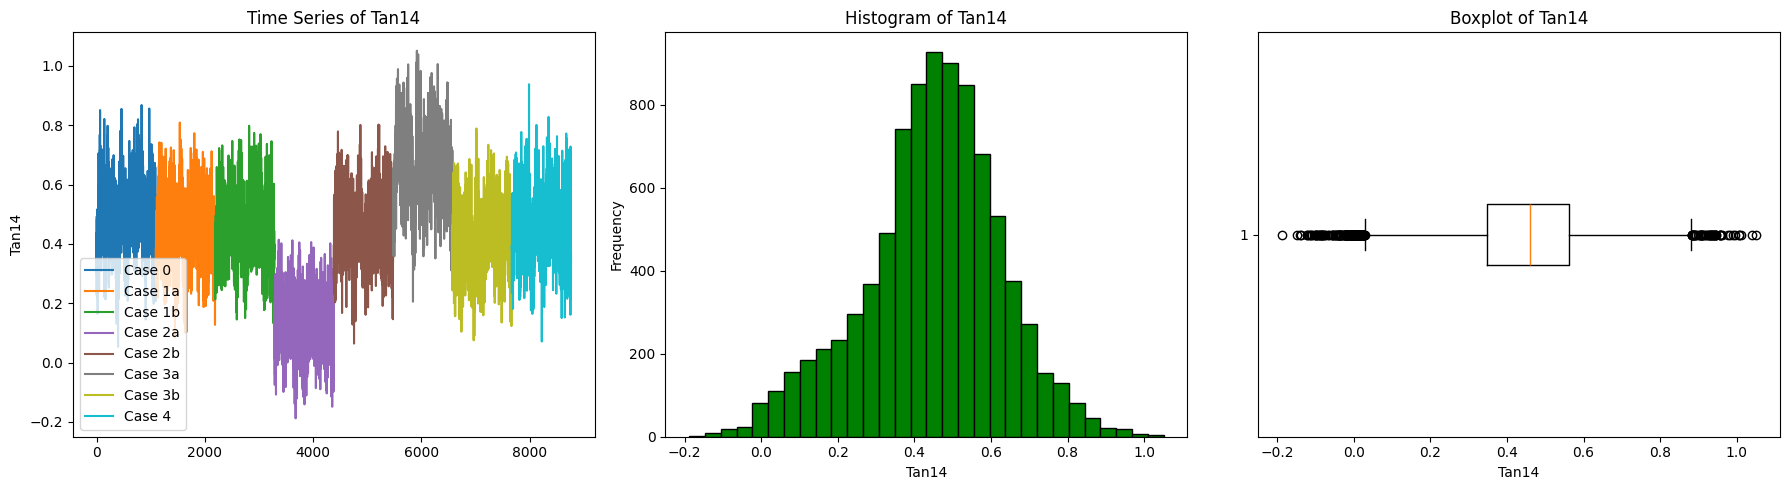

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


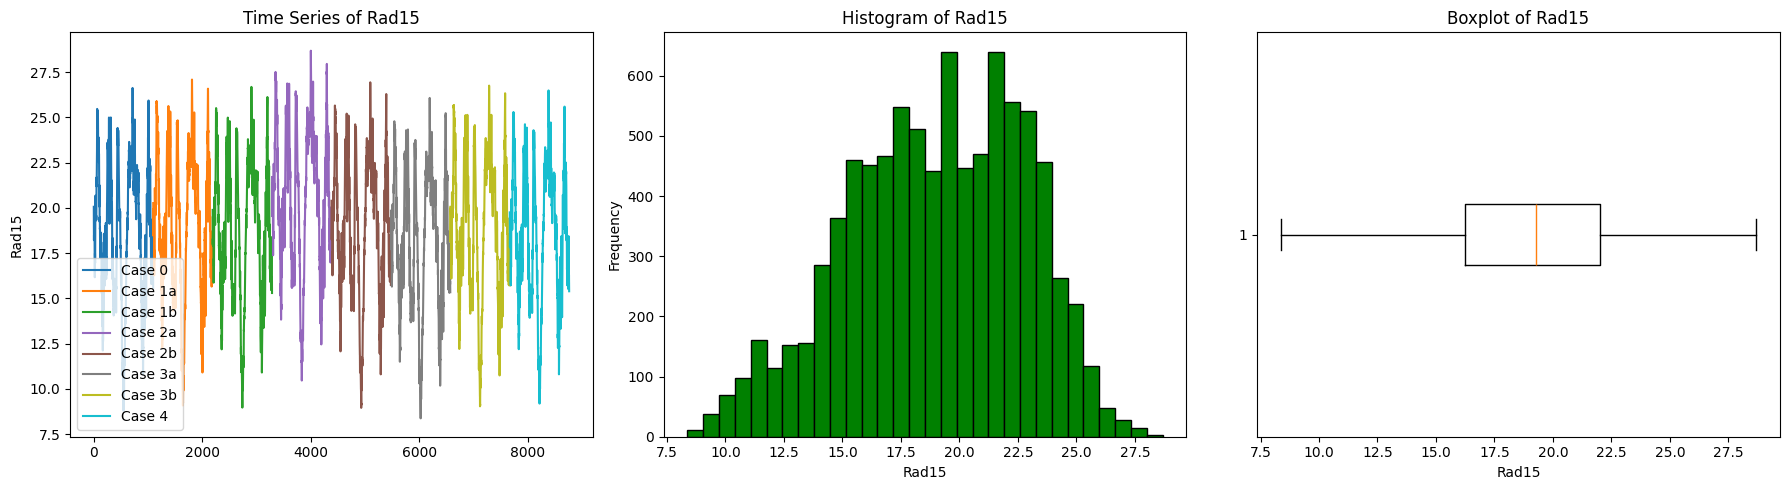

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


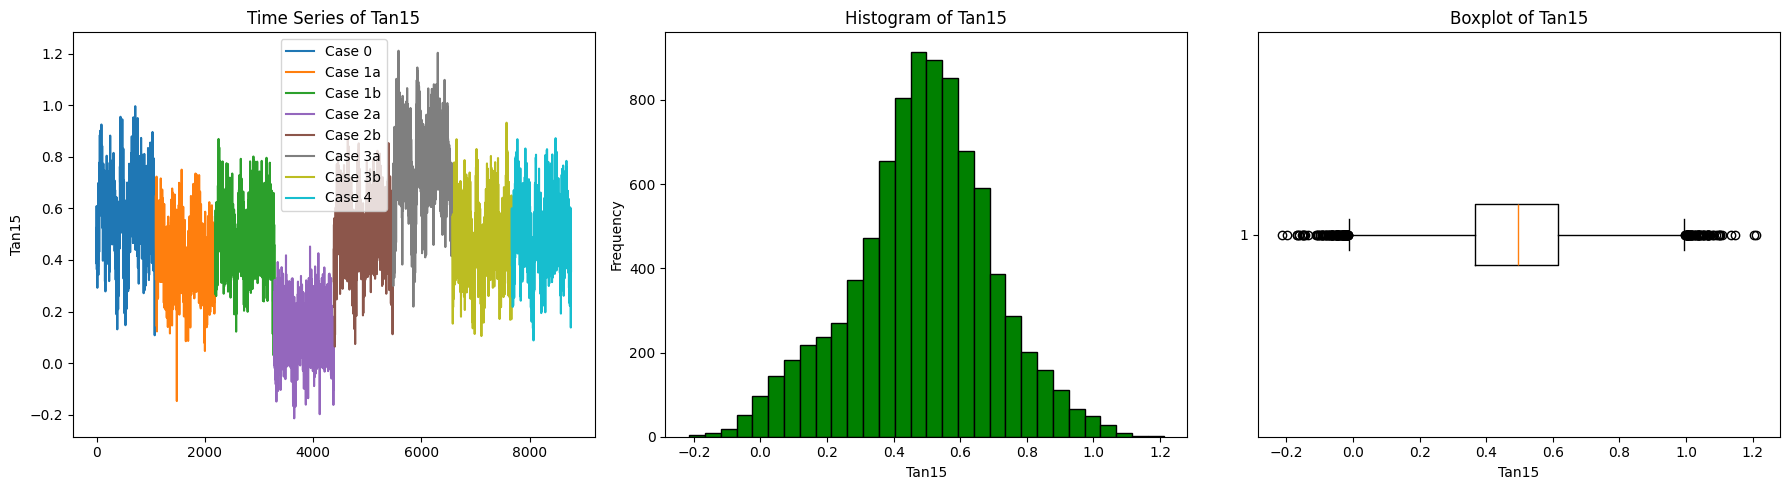

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


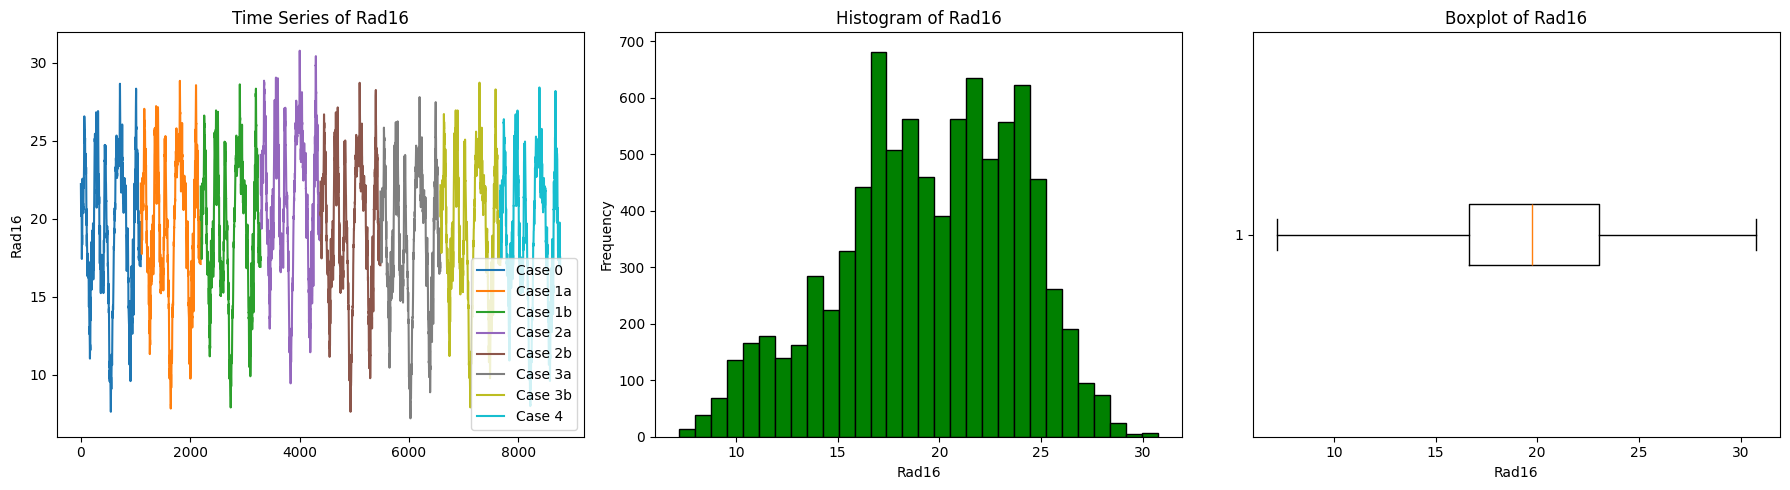

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


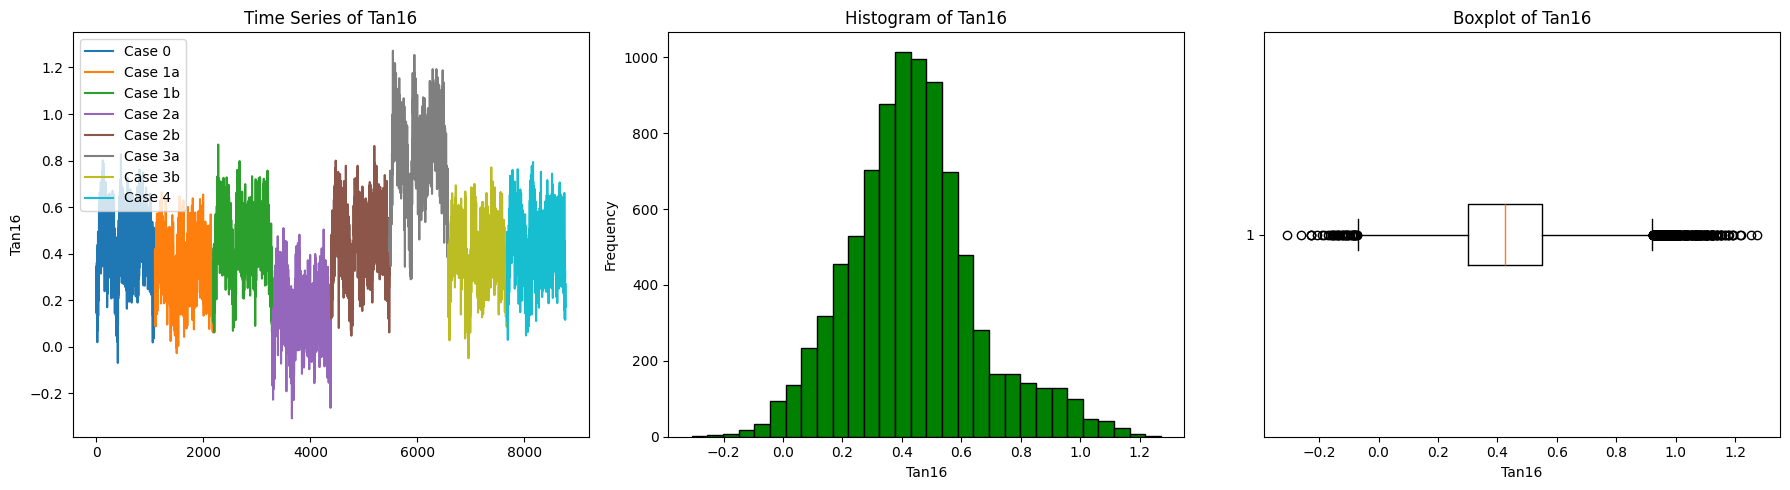

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


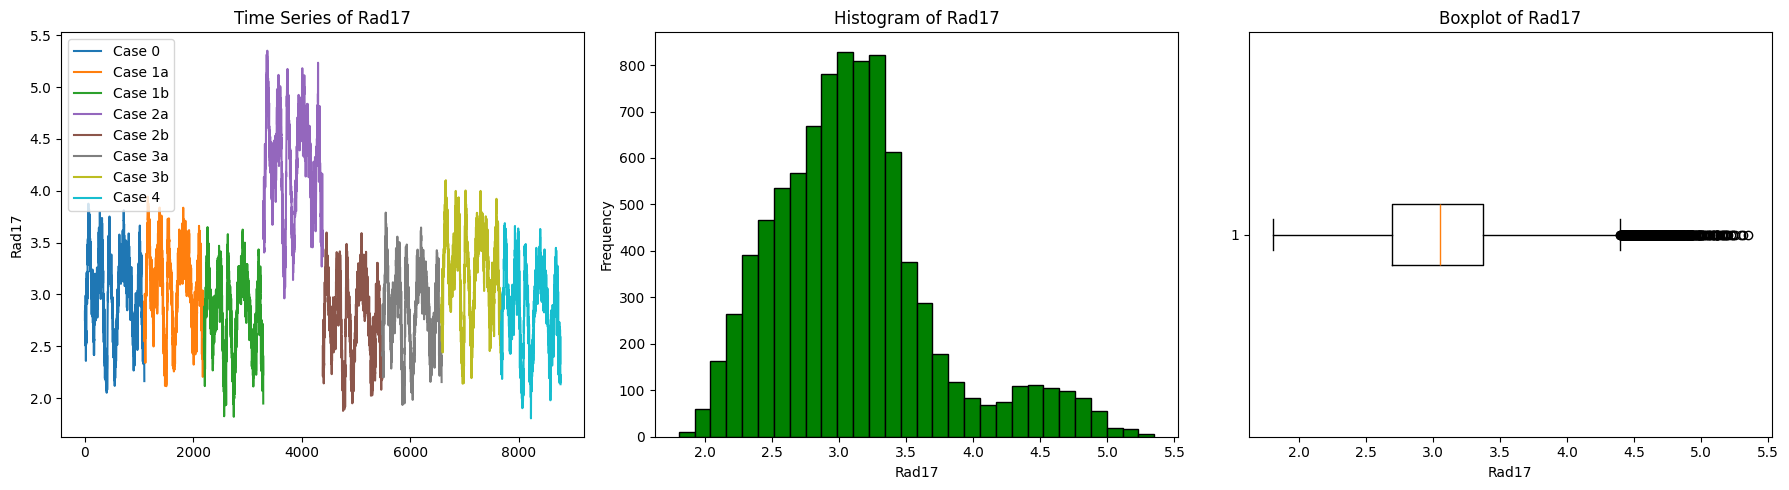

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


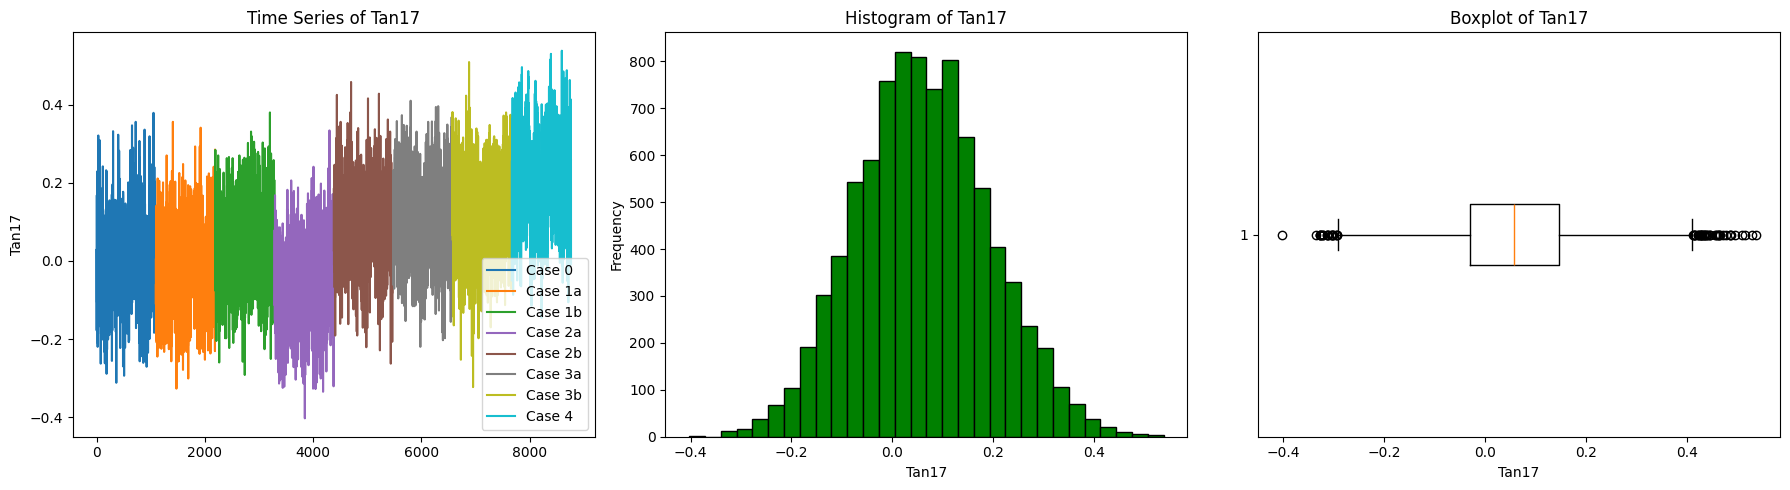

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


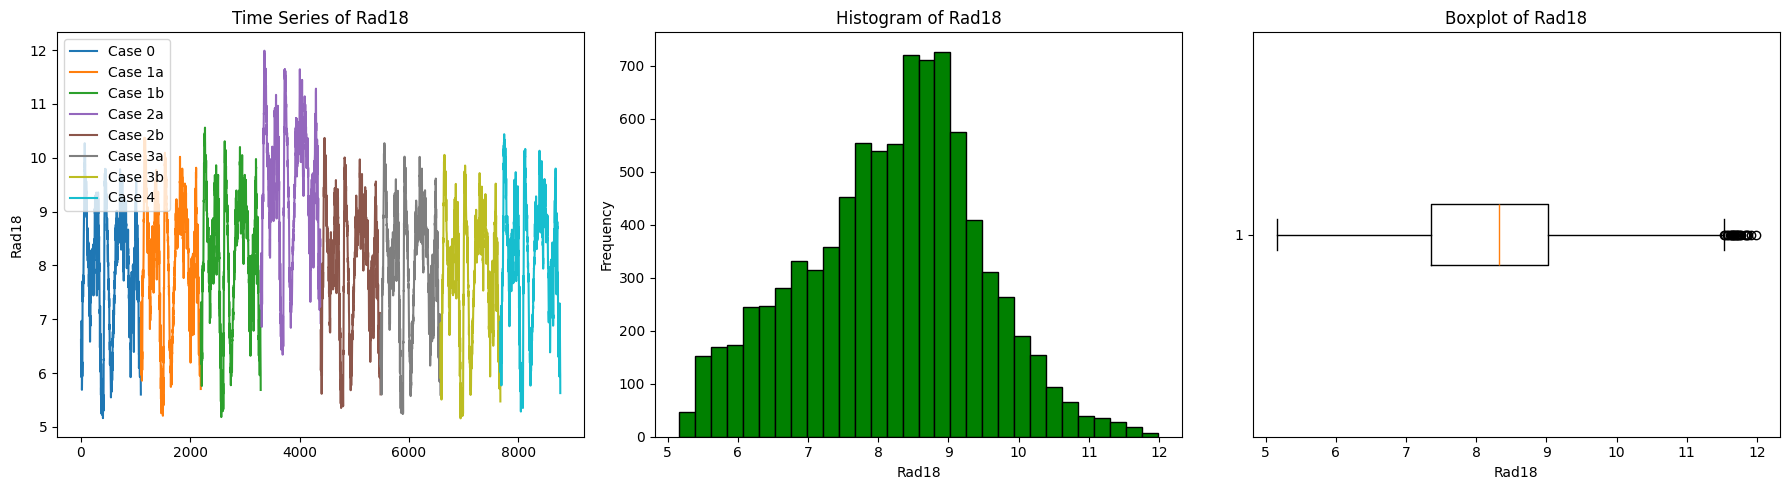

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


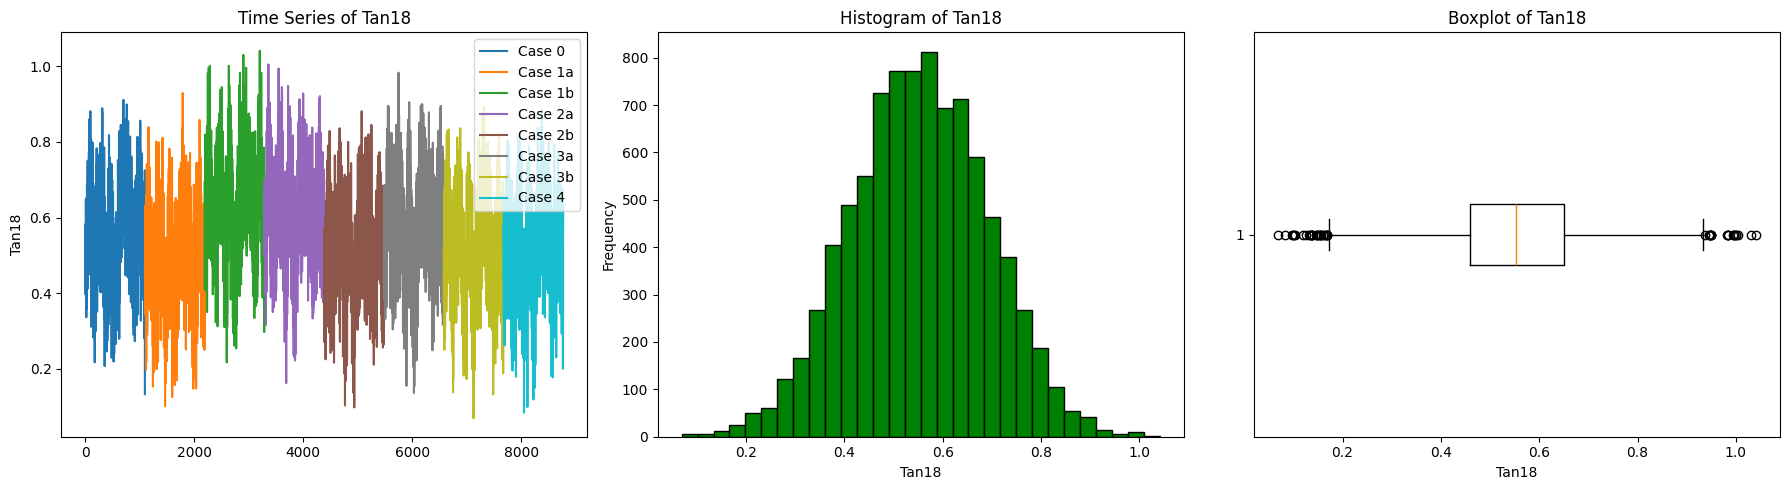

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


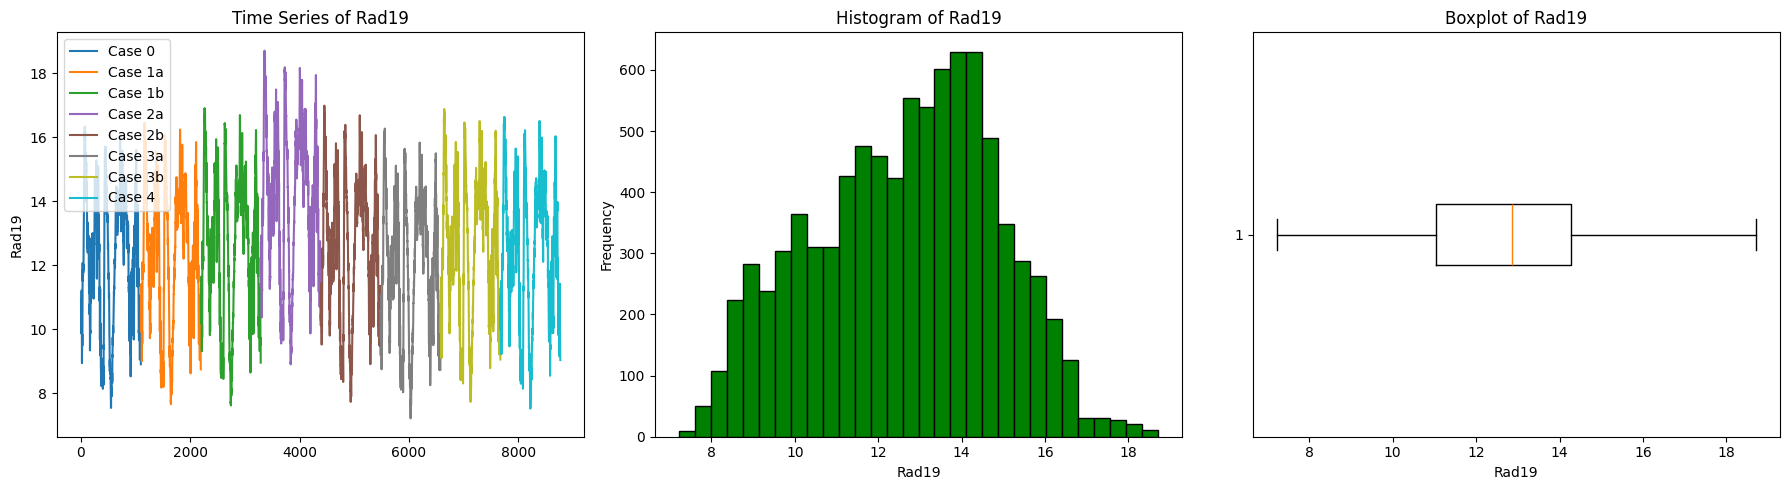

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


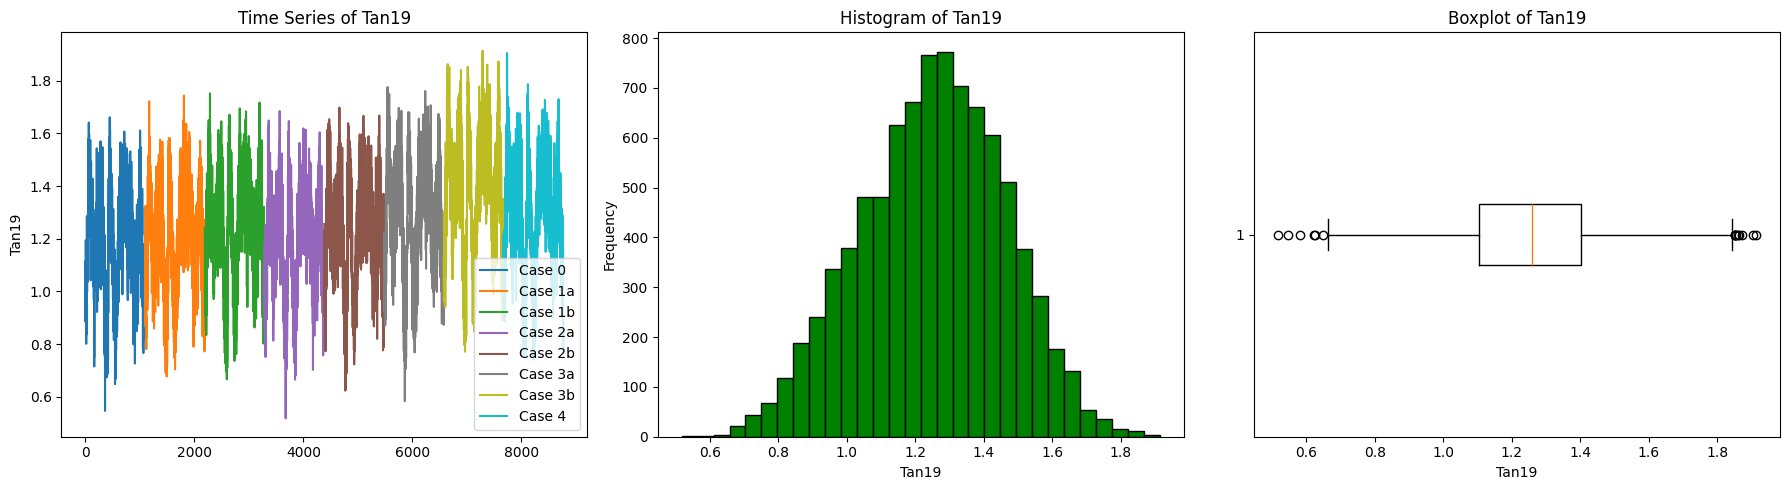

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


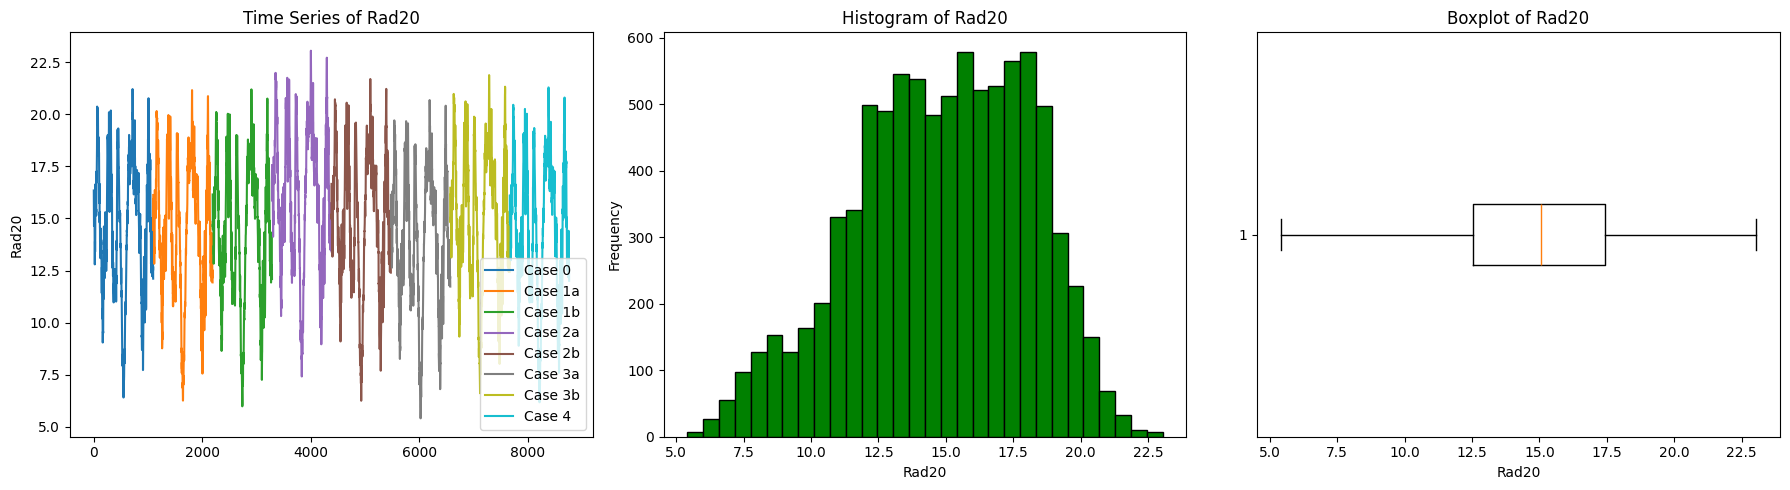

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


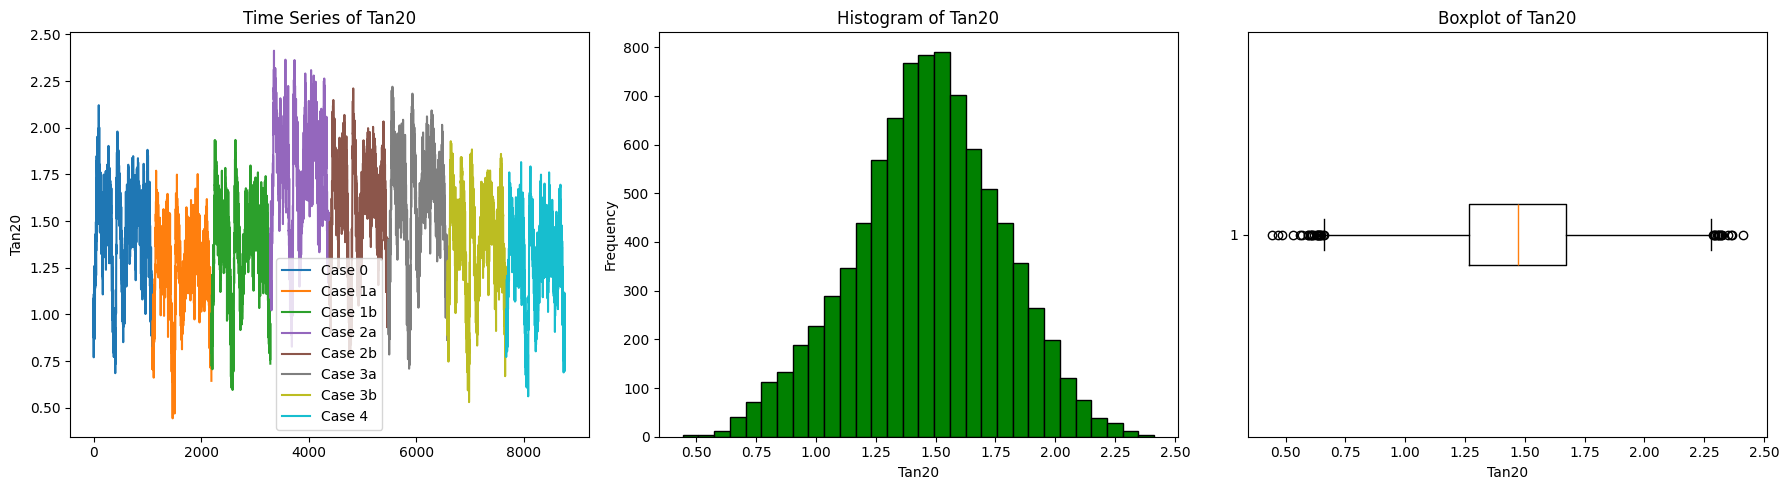

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


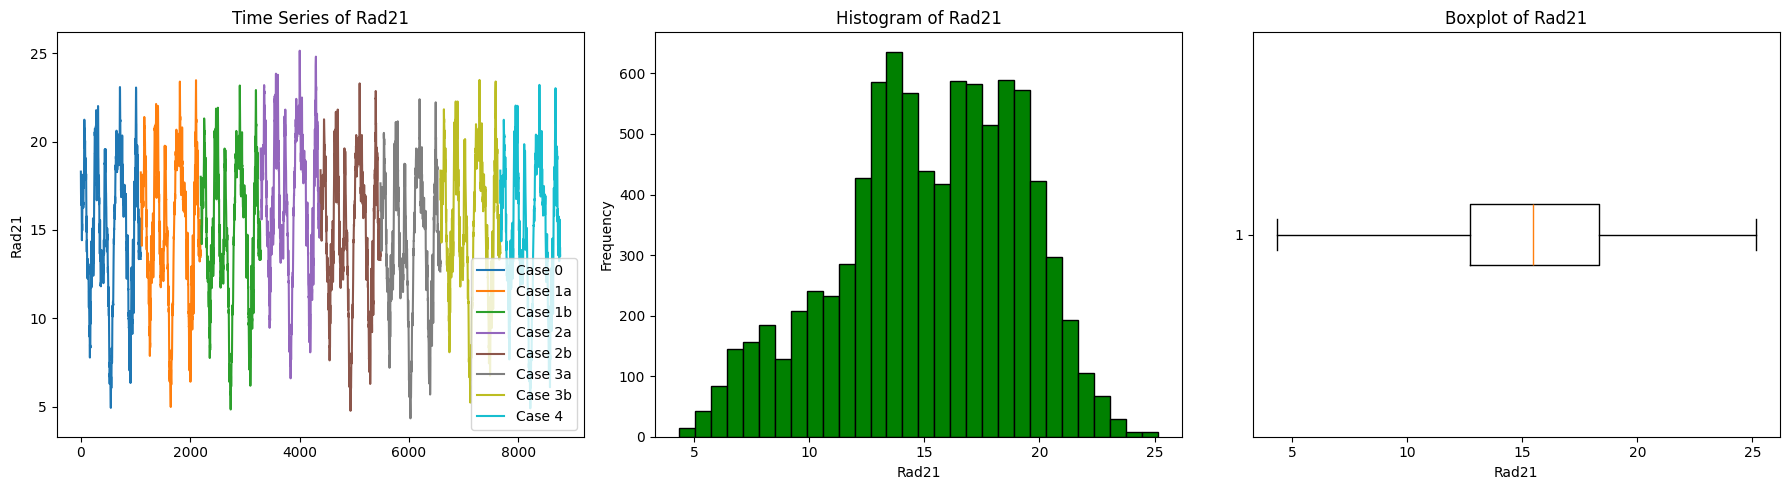

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


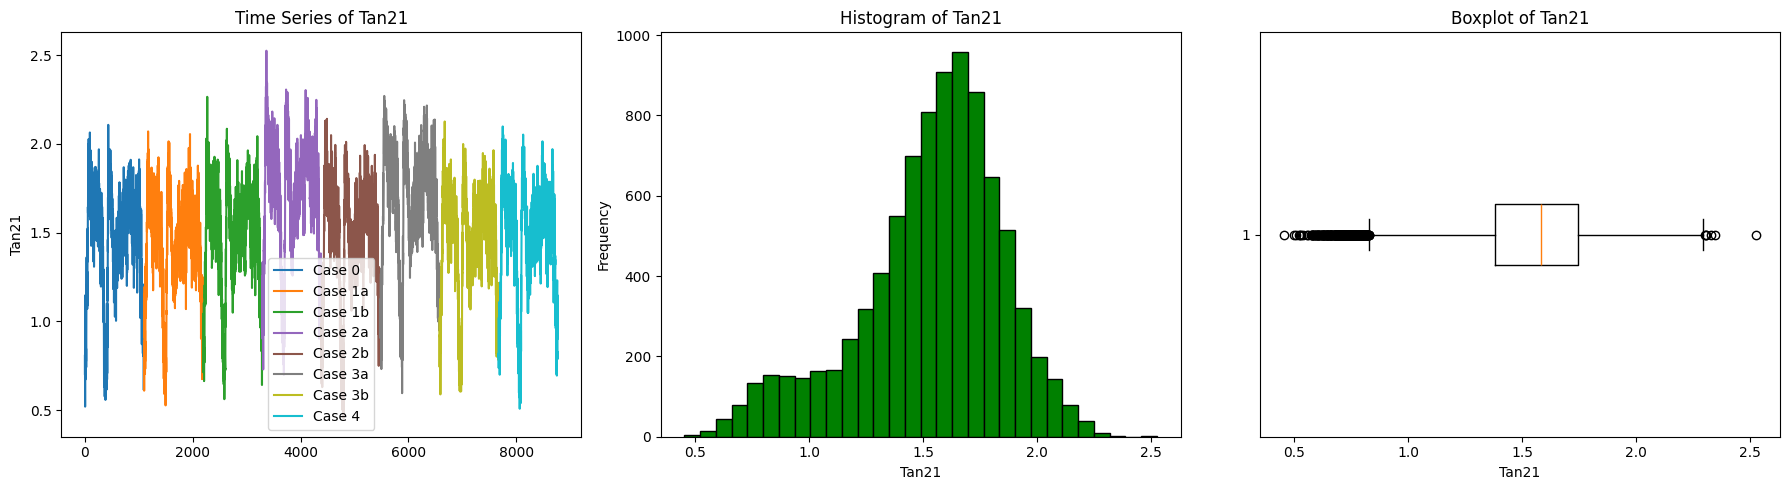

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


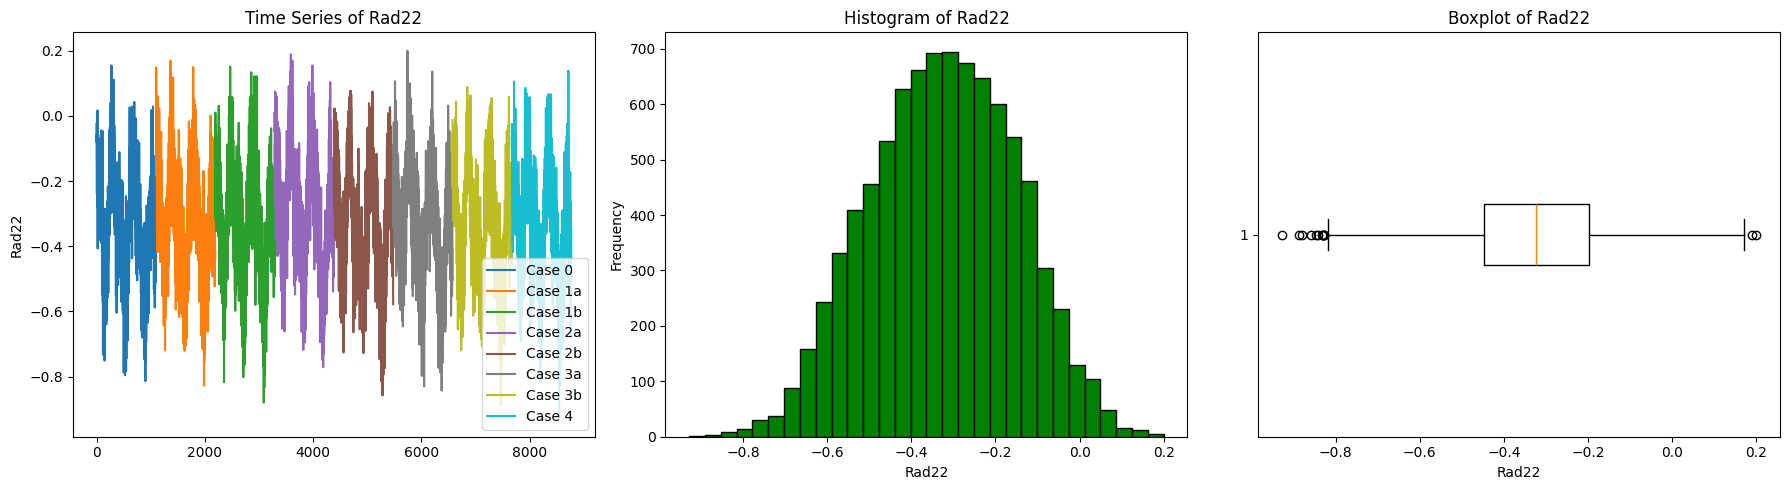

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


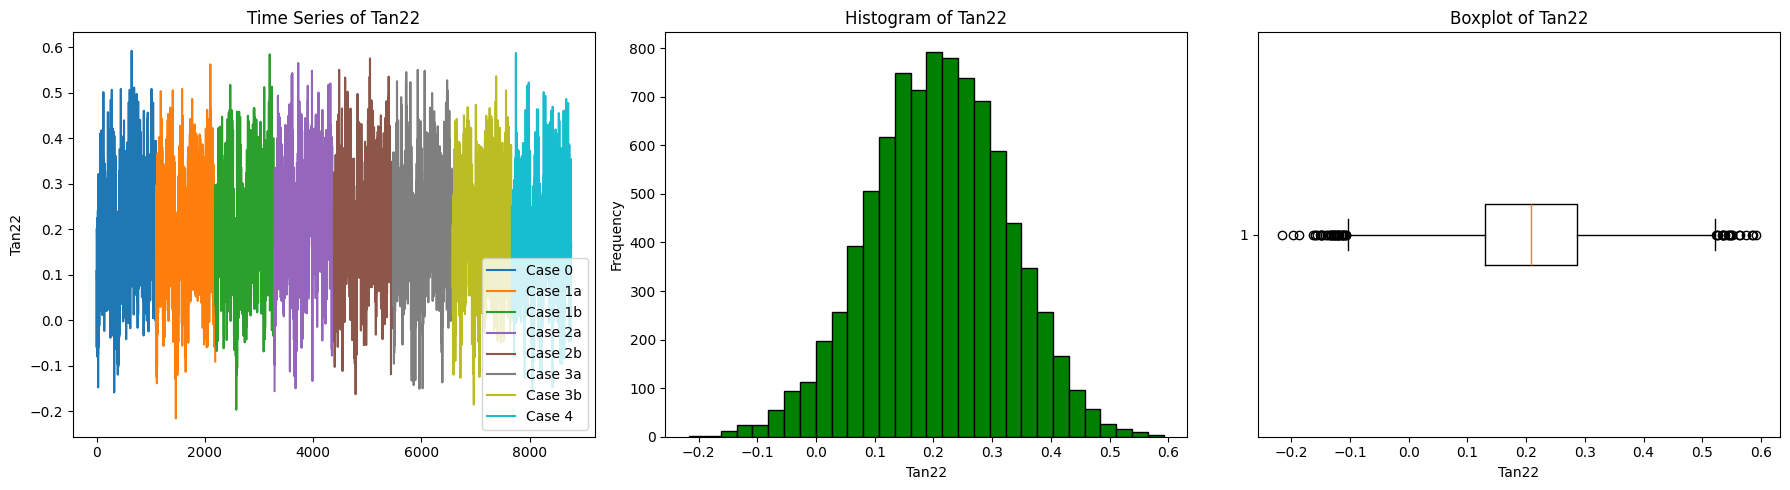

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


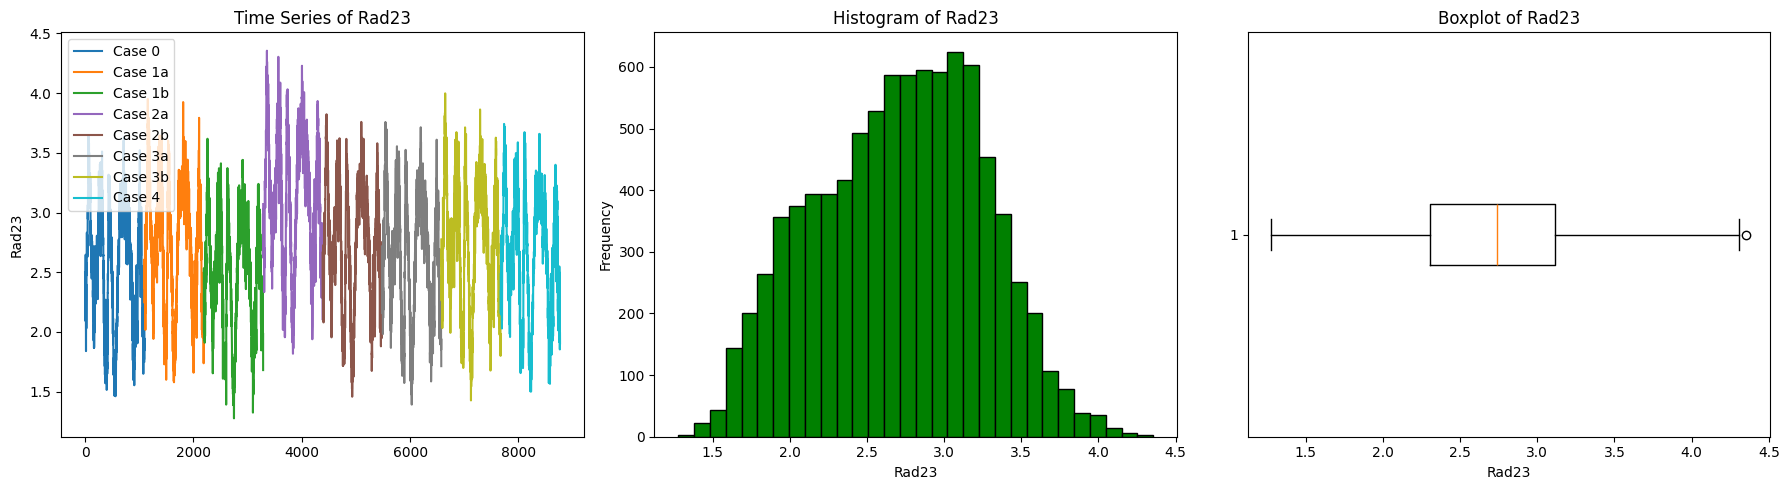

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


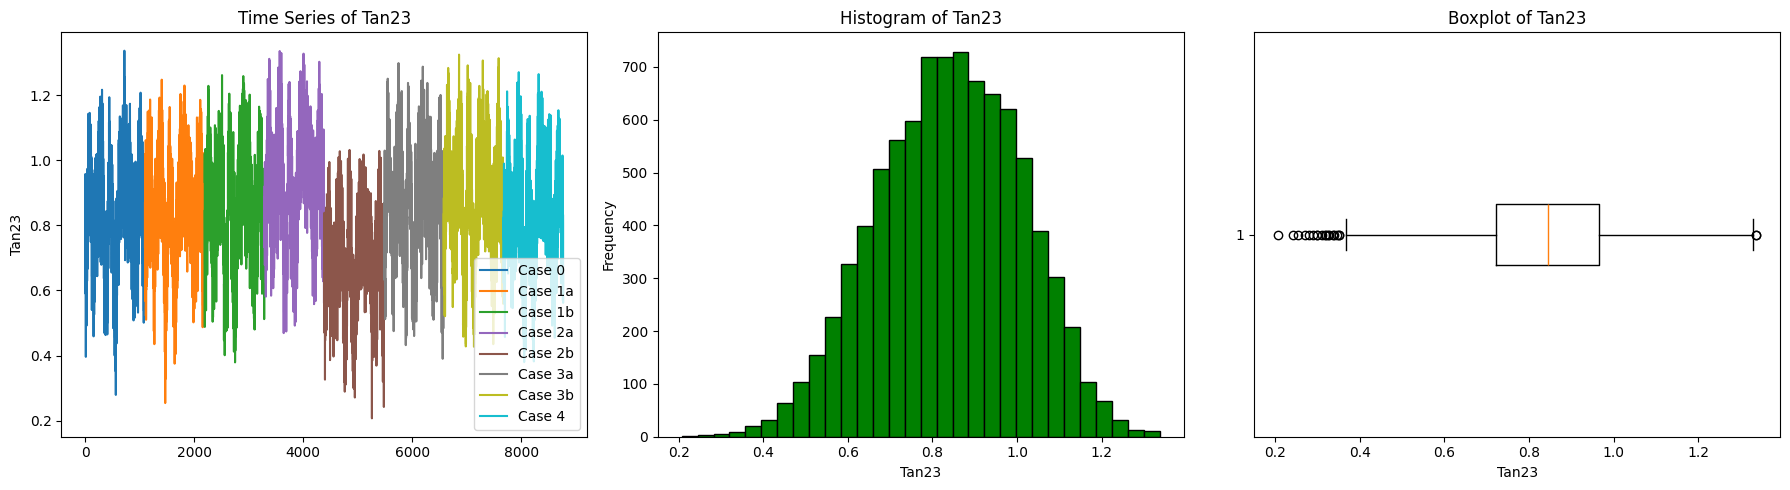

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


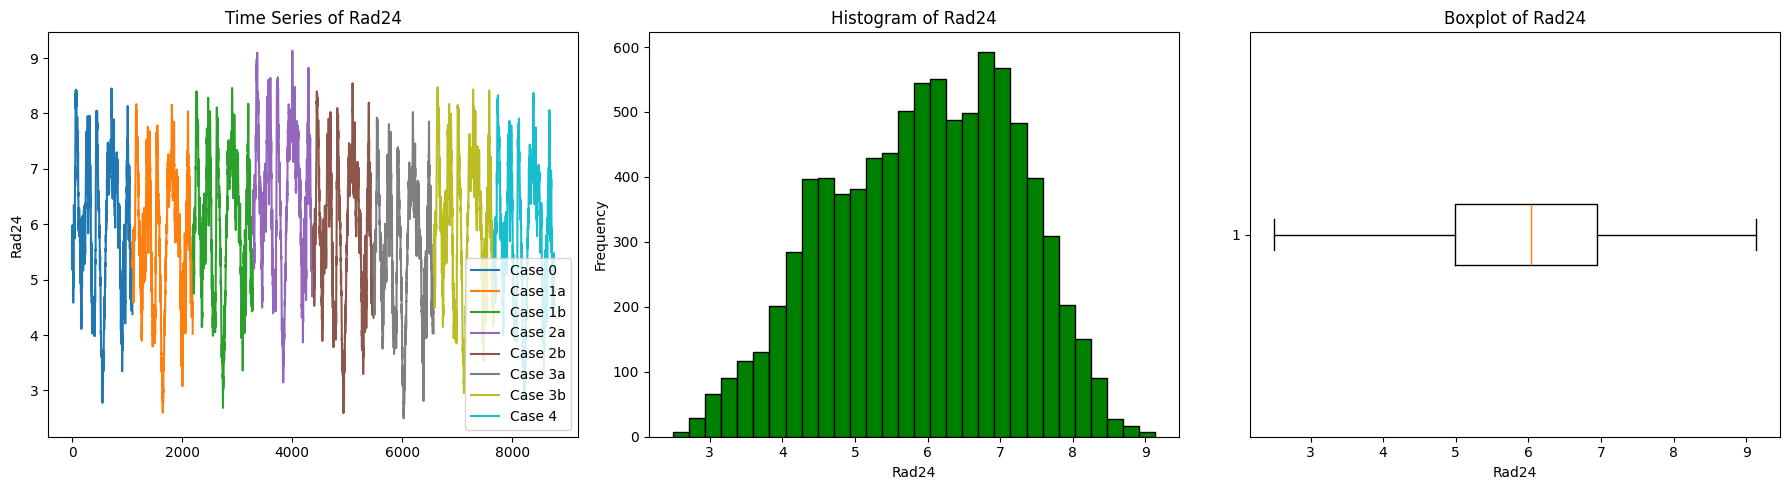

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


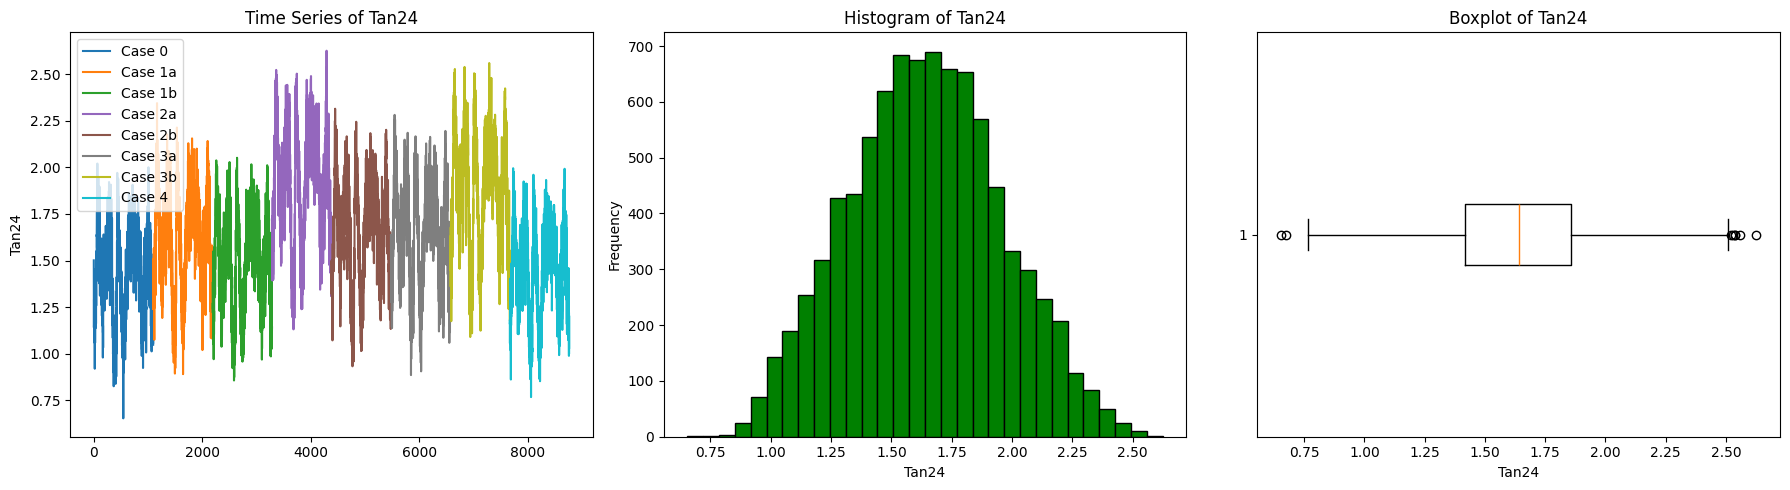

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


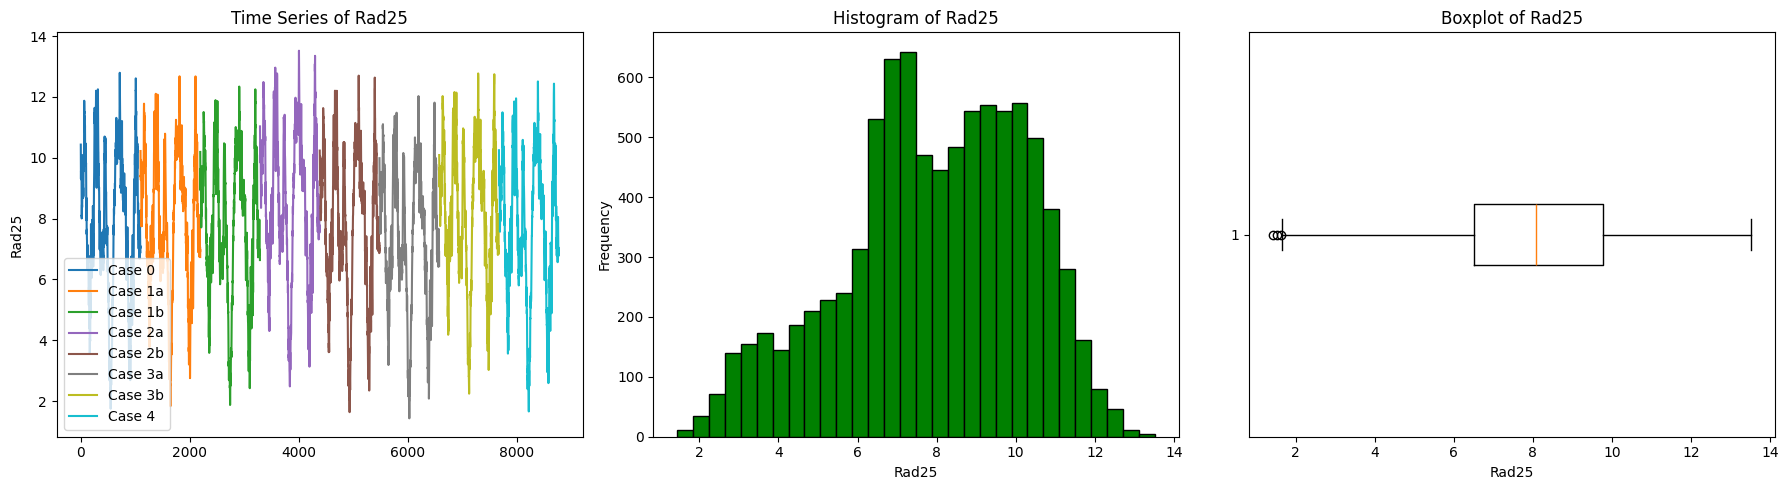

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


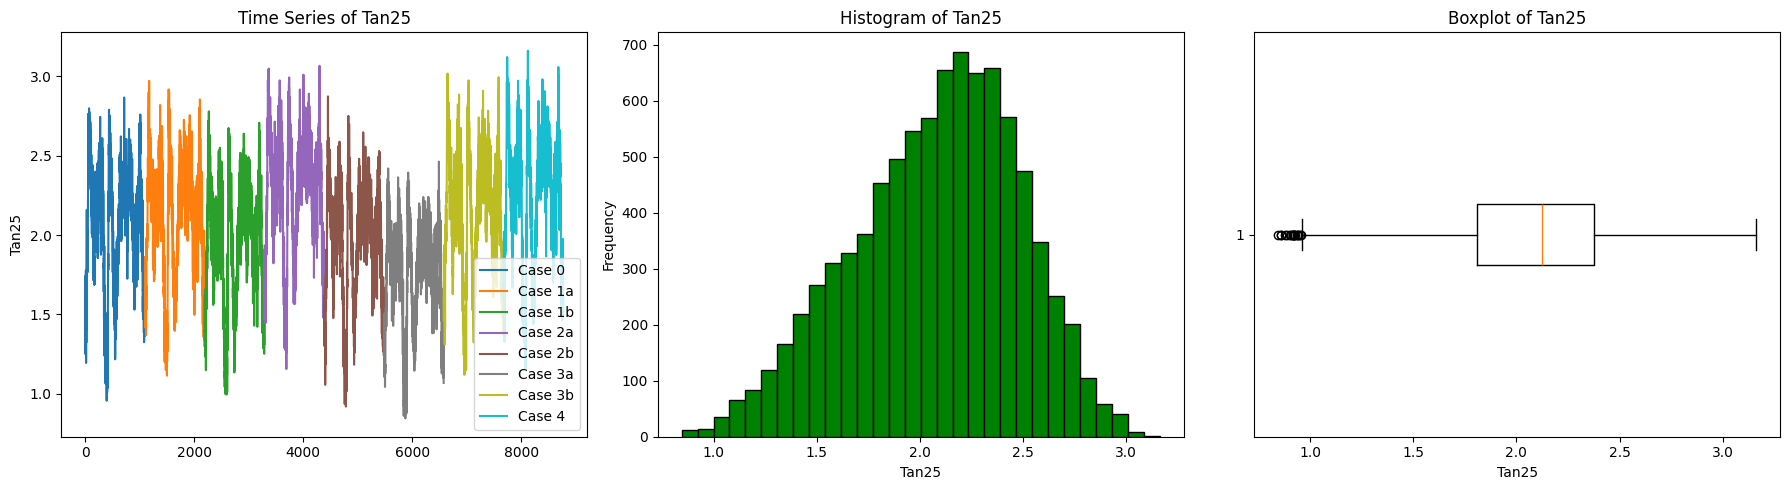

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


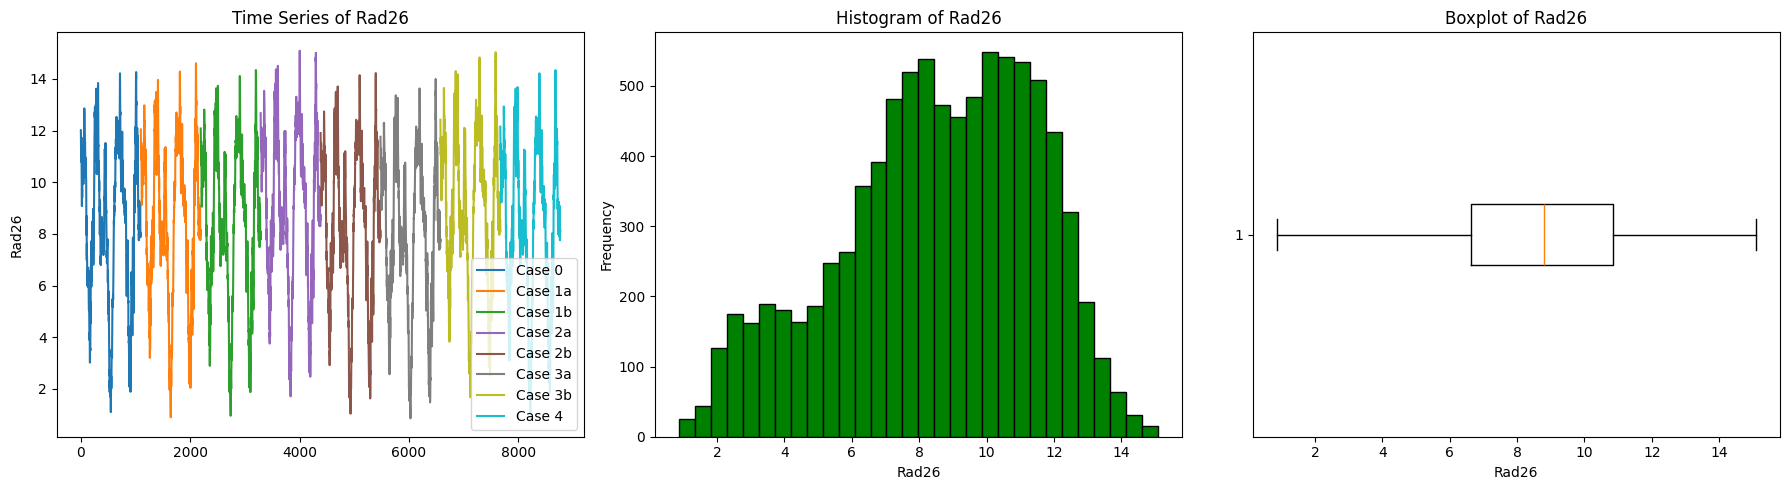

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


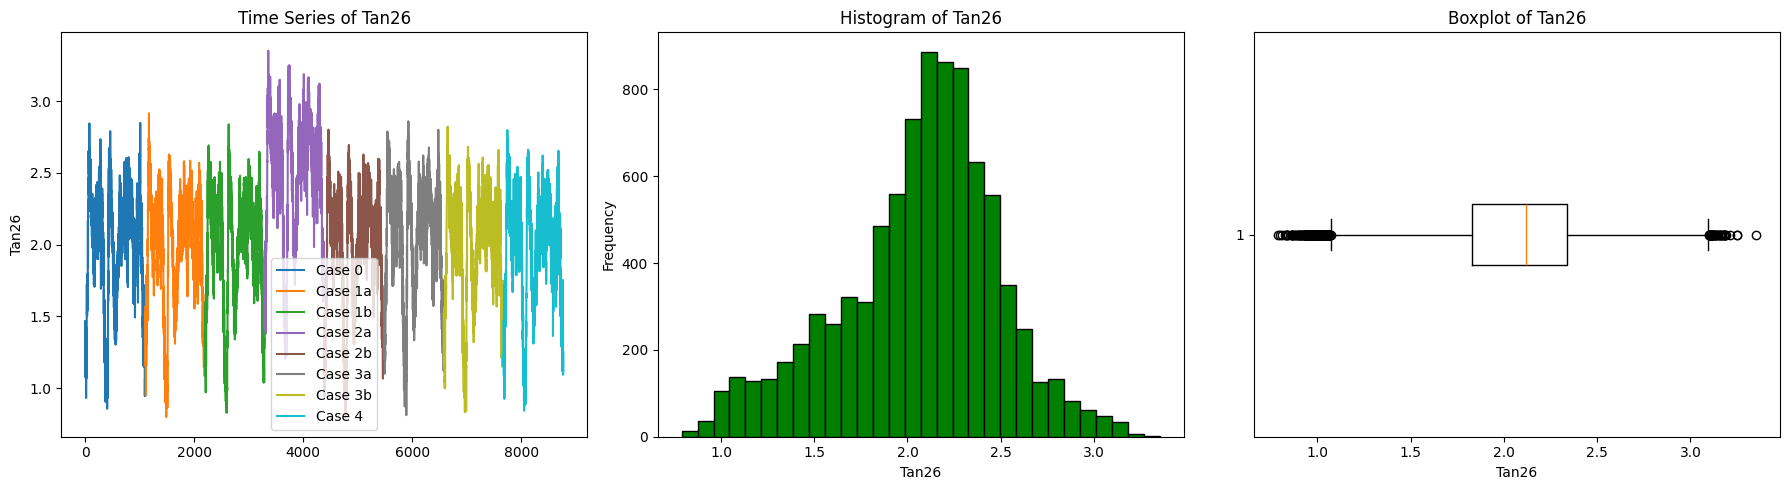

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


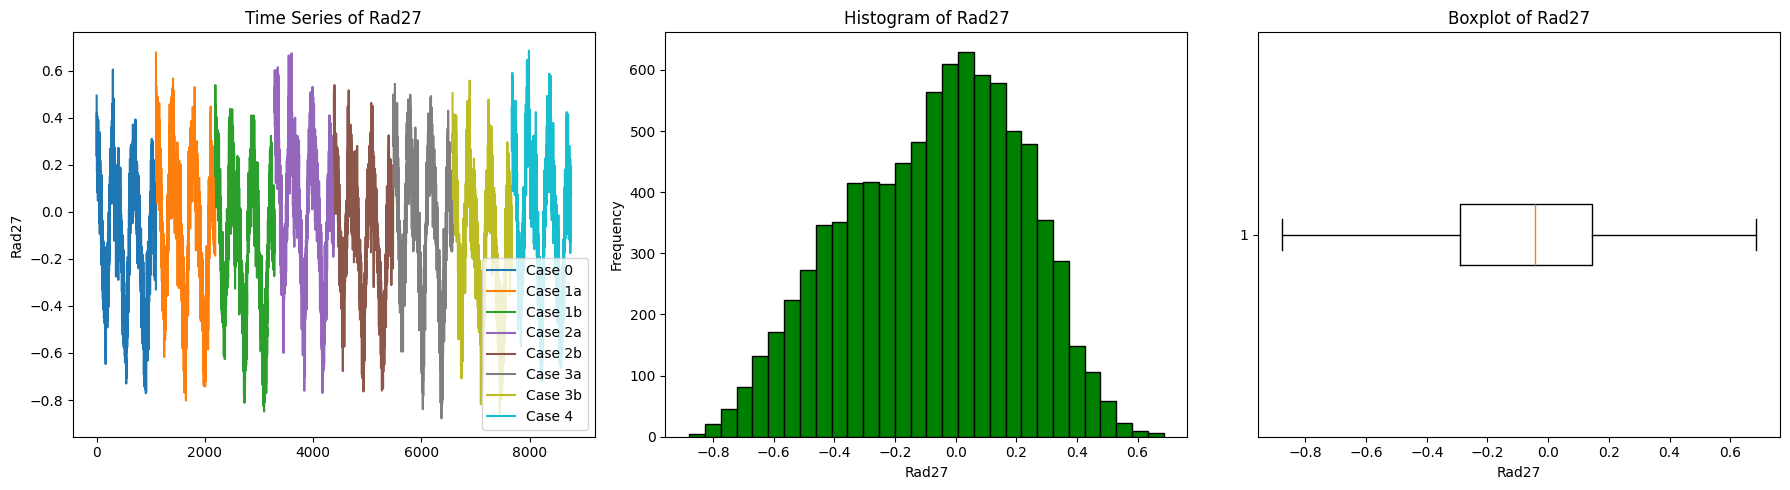

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


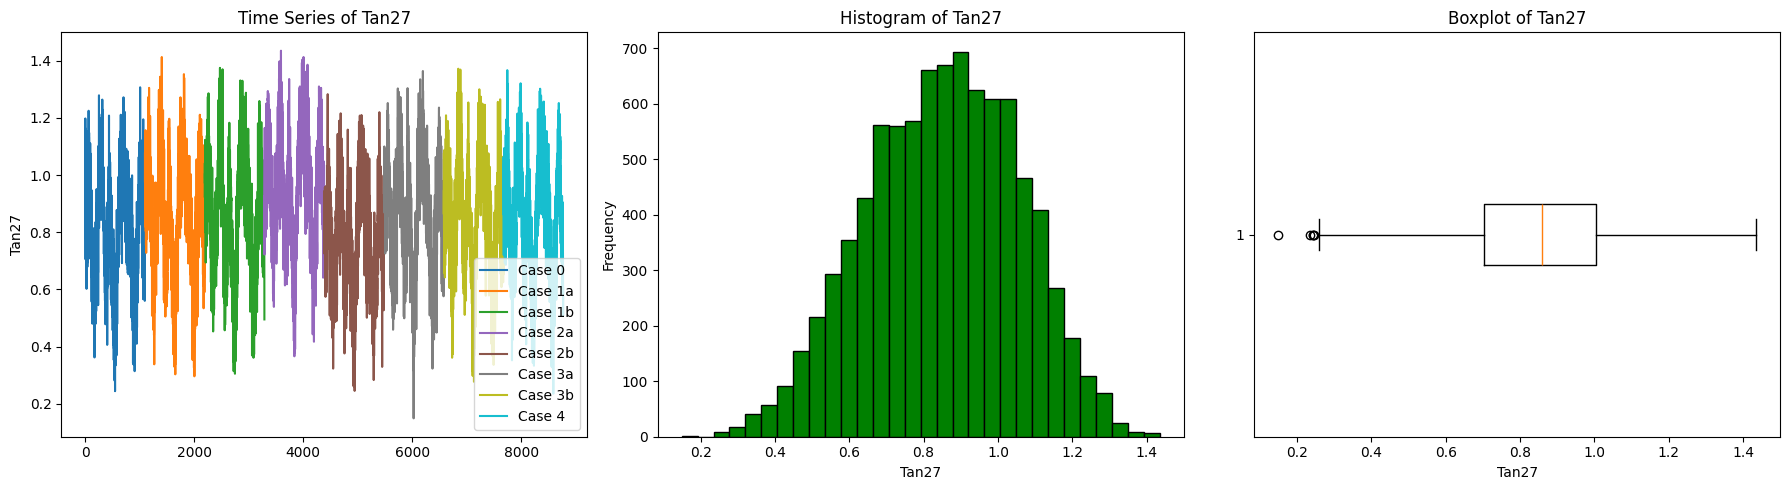

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


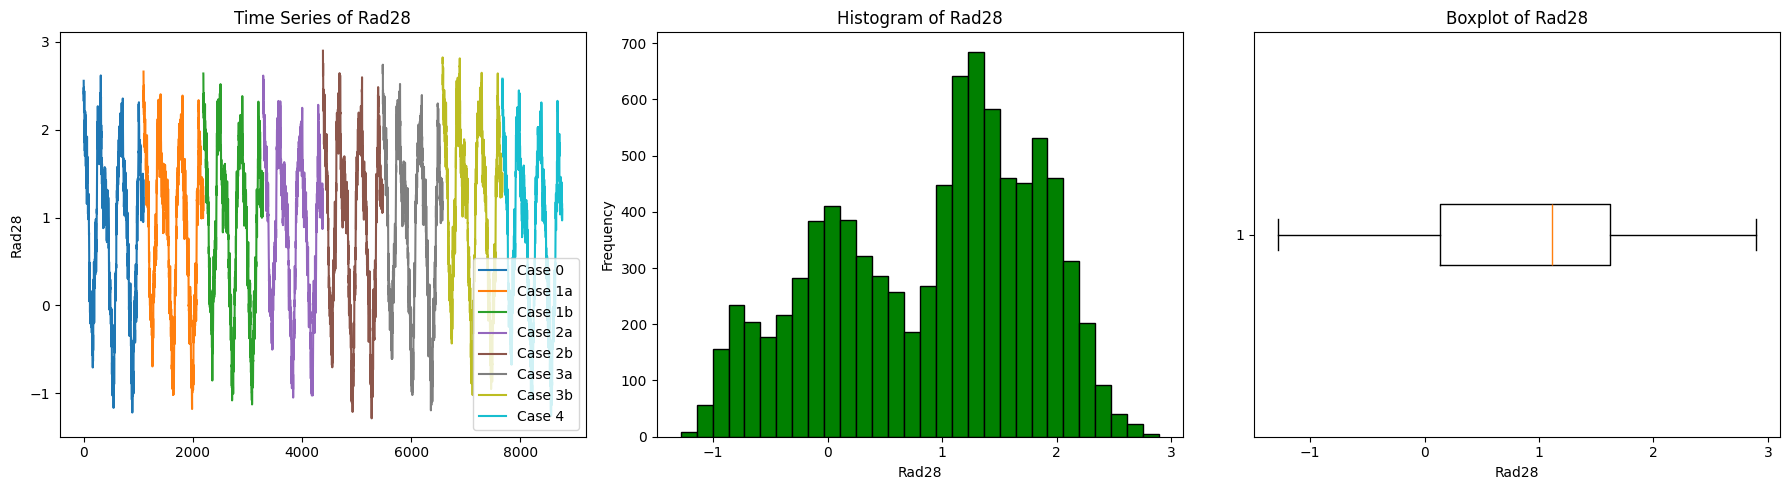

C:\Users\Admin\AppData\Local\Temp\ipykernel_8540\3402561770.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(cases))


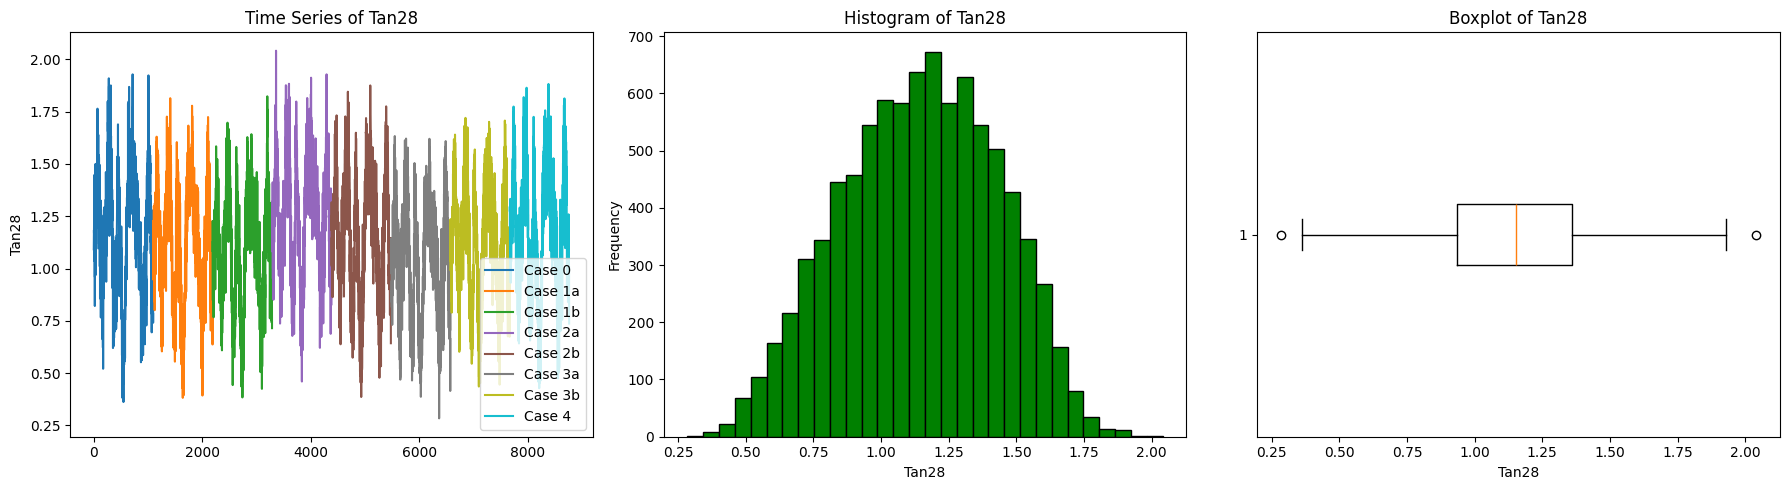

In [13]:
# Function to graph time series, histograms and boxplots
def plot_variable(data, variable):
    plt.figure(figsize=(18, 5))
    
    # Time series plot
    plt.subplot(1, 3, 1)
    cases = data['Case'].unique()
    colors = plt.cm.get_cmap('tab10', len(cases))
    for i, case in enumerate(cases):
        case_data = data[data['Case'] == case]
        plt.plot(case_data.index, case_data[variable], color=colors(i), label=f'Case {case}')
    plt.title(f'Time Series of {variable}')
    plt.ylabel(variable)
    plt.legend()
    
    # Histogram
    plt.subplot(1, 3, 2)
    plt.hist(data[variable].dropna(), bins=30, color='green', edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 3, 3)
    plt.boxplot(data[variable].dropna(), vert=False)
    plt.title(f'Boxplot of {variable}')
    plt.xlabel(variable)
    
    plt.tight_layout()
    plt.show()

# Iterate over the columns and apply the function
for column in data.columns:
    if data[column].dtype in ['float64', 'int64'] and column != 'Case':  # Make sure the column is numeric
        plot_variable(data, column)


# Justification of the Problem

Histogram of all categories together by variable

In [14]:
# Function to graph histograms by category and save them in EPS format
def plot_histograms_by_case(data, variable, output_folder='Figures'):
    plt.figure(figsize=(10, 6))
    
    # Plot histograms
    for case in data['Case'].unique():
        subset = data[data['Case'] == case]
        sns.histplot(subset[variable], kde=False, label=f'Case {case}', bins=30, alpha=0.6)

    # Text size settings
    plt.xlabel(variable, fontsize=16)  
    plt.ylabel('Frequency', fontsize=16)  
    plt.legend(title='Case', fontsize=16, title_fontsize=16) 
    plt.xticks(fontsize=16)  
    plt.yticks(fontsize=16)  

    # Save the figure in EPS format
    output_path = f"{output_folder}/histogram_{variable}.pdf"
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.close()  # Close the figure to free memory

In [15]:
# Iterate over the columns and apply the function
import os

In [16]:
# Create the 'Figures' folder if it doesn't exist
if not os.path.exists('Figures'):
    os.makedirs('Figures')

In [17]:
# Iterate over the columns and apply the function
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:  # Make sure the column is numeric
        plot_histograms_by_case(data, column)

# Dimensionality Reduction Visualization:

This code will do the following:

1-Calculate the cumulative explained variance: Use PCA to calculate the variance explained by each component and then calculate the cumulative explained variance.

2-Visualize the cumulative explained variance: Create a graph to visualize the cumulative explained variance as a function of the number of components.

3-Select the number of components: Select the minimum number of components that explain at least 95% of the variance.

In [18]:
data.head()

Level  Temperature_7  Rad01  Tan01  Rad02  Tan02  Rad03  Tan03  Rad04  \
0  51.82       5.530000  0.137 -0.718  1.716 -1.301  4.261 -1.974  0.832   
1  49.74       3.885000  0.309 -0.591  1.411 -1.523  4.409 -1.928  0.954   
2  49.20       4.166667  0.377 -0.534  1.568 -1.431  4.020 -1.990  0.910   
3  45.81       4.225000  0.043 -0.730  1.399 -1.399  4.137 -1.887  1.021   
4  48.38       3.742000 -0.047 -0.649  1.514 -1.446  3.895 -1.712  1.048   

   Tan04  ...  Tan24   Rad25  Tan25   Rad26  Tan26  Rad27  Tan27  Rad28  \
0 -0.359  ...  1.501  10.434  1.715  12.016  1.467  0.495  1.162  2.554   
1 -0.496  ...  1.353  10.021  1.554  11.750  1.152  0.285  0.989  2.323   
2 -0.538  ...  1.141   9.964  1.349  11.428  1.192  0.237  0.873  2.478   
3 -0.323  ...  1.157   9.306  1.381  11.240  1.075  0.285  1.198  2.452   
4 -0.381  ...  1.291   9.574  1.250  11.048  1.245  0.422  0.892  2.400   

   Tan28  Case  
0  1.092     0  
1  1.183     0  
2  1.157     0  
3  1.184     0  
4  1.169     0  

[5 rows x 59 columns]

Number of selected components: 3


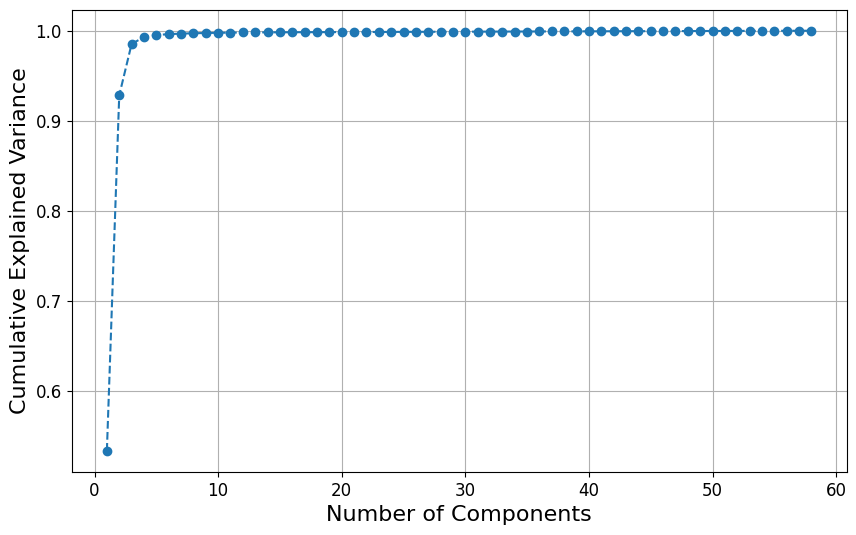

In [19]:
# Prepare the data
X = data.drop(['Case'], axis=1).values

# Apply PCA and calculate the explained variance
pca = PCA()
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 
         marker='o', linestyle='--')


plt.xlabel('Number of Components', fontsize=16)
plt.ylabel('Cumulative Explained Variance', fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid()

# Save the figure in EPS format
plt.savefig('explained_variance.eps', format='eps', bbox_inches='tight')

# Display the number of selected components
num_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Number of selected components: {num_components}')

The cumulative explained variance plot shows that only three components are needed to explain at least 95% of the variance in the data. This means we can reduce the dimensionality of the data set to three principal components without losing much information.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


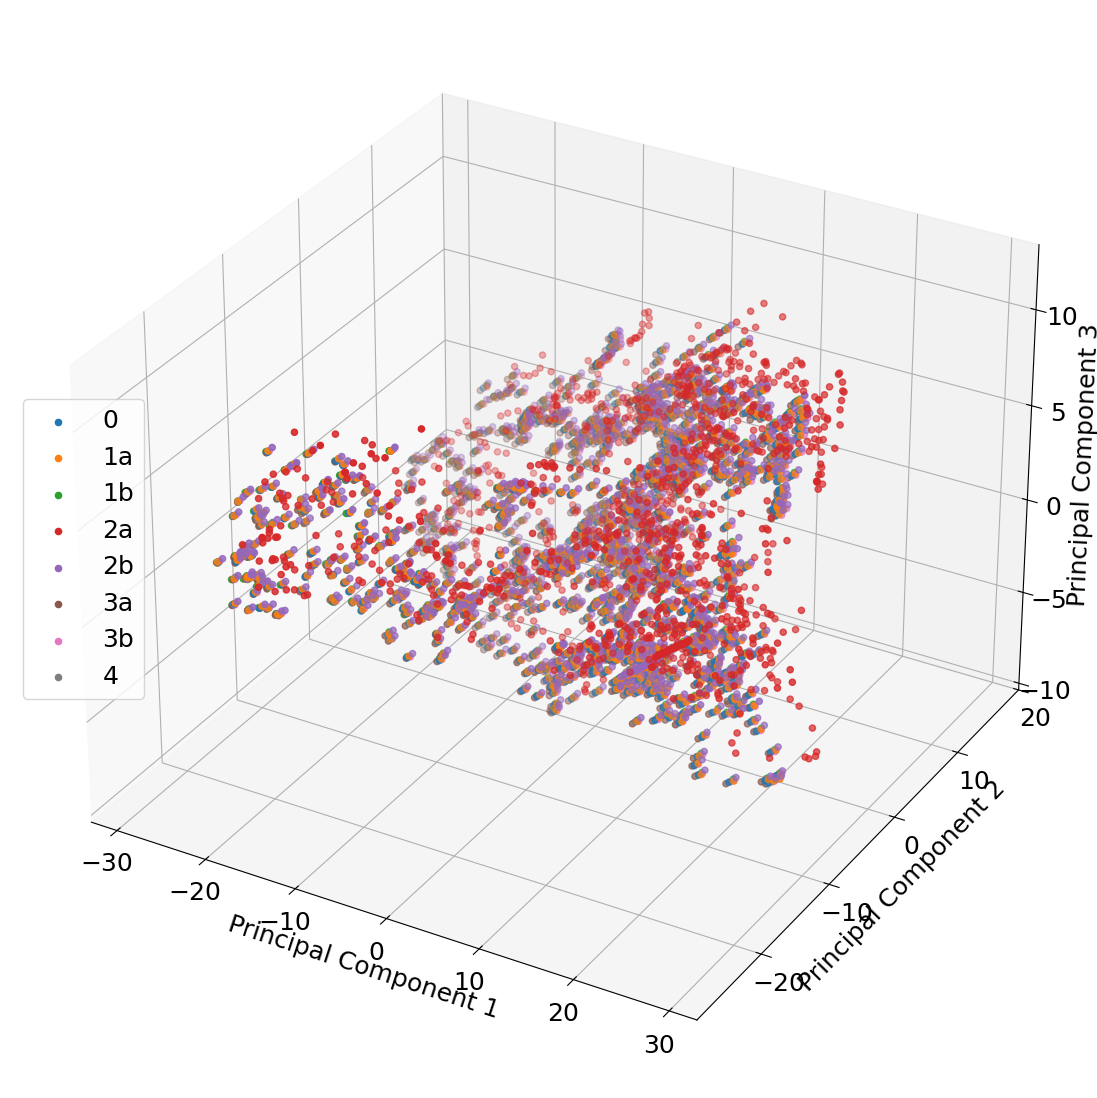

In [20]:
X = data.drop(['Case'], axis=1).values
y = data['Case'].values

# Apply PCA to reduce to three dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

## Create a DataFrame with the three principal components and the 'Case' label
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Case'] = y

# Visualize how samples cluster in three dimensions
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
groups = pca_df.groupby('Case')

# Adjust font size for axes and legend
font_size = 18 

for name, group in groups:
    ax.scatter(group['Principal Component 1'], group['Principal Component 2'], group['Principal Component 3'], label=name)


ax.set_xlabel('Principal Component 1', fontsize=font_size)
ax.set_ylabel('Principal Component 2', fontsize=font_size)
ax.set_zlabel('Principal Component 3', fontsize=font_size)


ax.tick_params(axis='both', which='major', labelsize=font_size)


ax.legend(fontsize=font_size, loc='center left')

# Save the figure in EPS format
plt.savefig('pca_3d.eps', format='eps', bbox_inches='tight')

# Show the figure
plt.show()

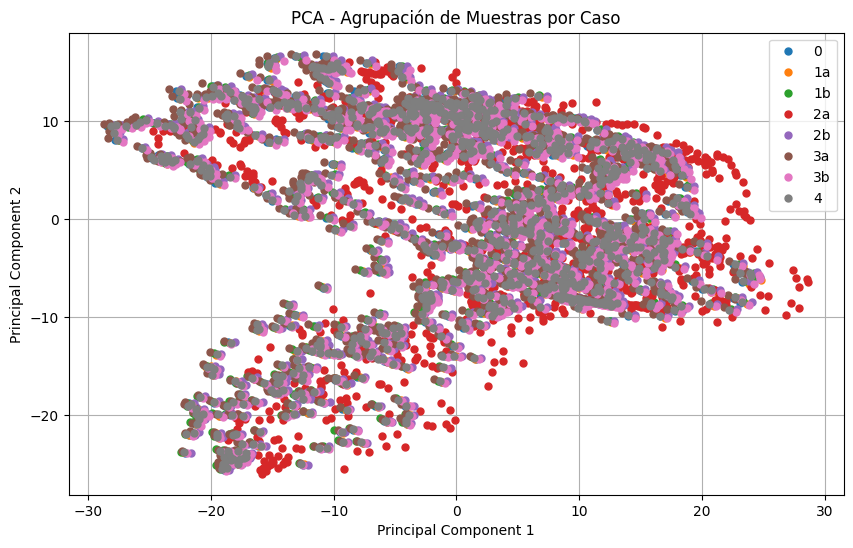

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preparar los datos
X = data.drop(['Case'], axis=1).values
y = data['Case'].values

# Aplicar PCA para reducir a dos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con las dos componentes principales y la etiqueta 'Case'
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Case'] = y

# Visualizar cómo se agrupan las muestras
plt.figure(figsize=(10, 6))
groups = pca_df.groupby('Case')
for name, group in groups:
    plt.plot(group['Principal Component 1'], group['Principal Component 2'], marker='o', linestyle='', ms=5, label=name)
plt.title('PCA - Agrupación de Muestras por Caso')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()